In [1]:
# Imports
import os
import sys
import yaml
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.cuda.amp import GradScaler
from tqdm import tqdm
from pathlib import Path
from torch.utils.data import DataLoader

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.train import Trainer

In [2]:
class TrainingMonitor:
    """Utility class for monitoring and visualizing training progress."""
    
    @staticmethod
    def plot_training_history(trainer, save_path=None):
        """Plot training and validation metrics."""
        if not hasattr(trainer, 'train_losses') or not hasattr(trainer, 'val_losses'):
            print("No training history found to plot.")
            return
            
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
        
        # Plot losses
        ax1.plot(trainer.train_losses, label='Train Loss')
        ax1.plot(trainer.val_losses, label='Validation Loss')
        ax1.set_title('Training and Validation Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)
        
        # Plot accuracies if available
        if hasattr(trainer, 'train_accuracies'):
            ax2.plot(trainer.train_accuracies, label='Train Accuracy')
            ax2.plot(trainer.val_accuracies, label='Validation Accuracy')
            ax2.set_title('Training and Validation Accuracy')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Accuracy')
            ax2.legend()
            ax2.grid(True)
        
        plt.tight_layout()
        if save_path:
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

Initializing trainer...
Using device: cuda

Building model...


2025-08-27 19:31:18,105 - INFO - Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
2025-08-27 19:31:18,639 - INFO - [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2025-08-27 19:31:19,136 - INFO - Model parameters: {'total': 16145476, 'trainable': 16145476, 'non_trainable': 0}



Preparing data...
Loading diagnostics from: /mnt/d/ML/Projects/Breast-Thermography/data/raw/Breast-Thermography-Raw/Diagnostics.xlsx


2025-08-27 19:31:20,708 - INFO - Class distribution: {0: 84, 1: 35}
2025-08-27 19:31:20,710 - INFO - Using effective class weights: [0.5983625054359436, 1.4016374349594116]
2025-08-27 19:31:20,754 - INFO - Class distribution: {0: 84, 1: 35}
2025-08-27 19:31:20,755 - INFO - Using effective class weights: [0.5983625054359436, 1.4016374349594116]
2025-08-27 19:31:20,756 - INFO - 
2025-08-27 19:31:20,757 - INFO - DATASET SUMMARY
2025-08-27 19:31:20,758 - INFO - ==================================================
2025-08-27 19:31:20,759 - INFO - Total samples: 119
2025-08-27 19:31:20,759 - INFO - Class distribution:
2025-08-27 19:31:20,761 - INFO -   - Benign: 84 samples
2025-08-27 19:31:20,762 - INFO -   - Malignant: 35 samples
2025-08-27 19:31:20,765 - INFO - 
--------------------------------------------------
2025-08-27 19:31:20,766 - INFO - Training samples: 95
2025-08-27 19:31:20,767 - INFO - Validation samples: 24
2025-08-27 19:31:20,768 - INFO - ---------------------------------------


DataFrame loaded with columns: ['Image', 'Left', 'Right', 'Weight (Kg)', 'Height(cm)', 'Temp(°C)', 'Age(years)', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'left_label', 'right_label', 'label', 'combined_label']
Sample data:
     Image Left Right combined_label
0  IIR0001   PB     N         Benign
1  IIR0002    N    PB         Benign
2  IIR0003    N    PB         Benign
3  IIR0004   PB     N         Benign
4  IIR0005   PB     N         Benign

Creating datasets...
Loading diagnostics from: /mnt/d/ML/Projects/Breast-Thermography/data/raw/Breast-Thermography-Raw/Diagnostics.xlsx

Processing 95 samples...


Processing:   0%|                                                                         | 0/95 [00:00<?, ?it/s]


Error processing IIR0100: single positional indexer is out-of-bounds


Processing:   3%|██                                                               | 3/95 [00:00<00:03, 28.05it/s]


Error processing IIR0117: single positional indexer is out-of-bounds


Processing:   6%|████                                                             | 6/95 [00:00<00:03, 27.69it/s]


Error processing IIR0111: single positional indexer is out-of-bounds


Processing:   9%|██████▏                                                          | 9/95 [00:00<00:03, 27.59it/s]


Error processing IIR0119: single positional indexer is out-of-bounds


Processing:  13%|████████                                                        | 12/95 [00:00<00:03, 27.60it/s]


Error processing IIR0112: single positional indexer is out-of-bounds


Processing:  17%|██████████▊                                                     | 16/95 [00:00<00:02, 30.68it/s]


Error processing IIR0114: single positional indexer is out-of-bounds


Processing:  21%|█████████████▍                                                  | 20/95 [00:00<00:02, 32.56it/s]


Error processing IIR0102: single positional indexer is out-of-bounds

Error processing IIR0098: single positional indexer is out-of-bounds

Error processing IIR0099: single positional indexer is out-of-bounds


Processing:  25%|████████████████▏                                               | 24/95 [00:00<00:03, 21.11it/s]


Error processing IIR0096: single positional indexer is out-of-bounds


Processing:  47%|██████████████████████████████▎                                 | 45/95 [00:01<00:00, 54.39it/s]


Error processing IIR0103: single positional indexer is out-of-bounds


Processing:  55%|███████████████████████████████████                             | 52/95 [00:01<00:00, 55.47it/s]


Error processing IIR0101: single positional indexer is out-of-bounds


Processing:  62%|███████████████████████████████████████▋                        | 59/95 [00:01<00:00, 56.48it/s]


Error processing IIR0105: single positional indexer is out-of-bounds


Processing:  68%|███████████████████████████████████████████▊                    | 65/95 [00:01<00:00, 55.28it/s]


Error processing IIR0118: single positional indexer is out-of-bounds


Processing:  75%|███████████████████████████████████████████████▊                | 71/95 [00:01<00:00, 54.70it/s]


Error processing IIR0115: single positional indexer is out-of-bounds


Processing:  84%|█████████████████████████████████████████████████████▉          | 80/95 [00:01<00:00, 60.19it/s]


Error processing IIR0110: single positional indexer is out-of-bounds


Processing:  92%|██████████████████████████████████████████████████████████▌     | 87/95 [00:01<00:00, 60.04it/s]


Error processing IIR0116: single positional indexer is out-of-bounds

Error processing IIR0108: single positional indexer is out-of-bounds

Error processing IIR0104: single positional indexer is out-of-bounds


Processing: 100%|████████████████████████████████████████████████████████████████| 95/95 [00:02<00:00, 44.19it/s]
2025-08-27 19:31:22,970 - INFO - Processed data saved successfully.
2025-08-27 19:31:22,974 - INFO - 
DATA LOADER CONFIGURATION:
2025-08-27 19:31:22,975 - INFO - Batch size: 4
2025-08-27 19:31:22,976 - INFO - Number of workers: 4
2025-08-27 19:31:22,977 - INFO - CUDA available: True
2025-08-27 19:31:22,978 - INFO - 
2025-08-27 19:31:22,979 - INFO - DATASET CREATION COMPLETE
2025-08-27 19:31:22,979 - INFO - ==================================================




Processing complete!
  - Processed: 76/95 samples
  - Errors: 19
  - Time taken: 2.15 seconds


Processed data saved to: /mnt/d/ML/Projects/Breast-Thermography/data/processed

Training samples: 95
Validation samples: 24

Initializing optimizer and scaler...

Starting training...


Epoch 1/25:   0%|                                                                         | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:22,991 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:31:23,000 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:31:23,006 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:31:23,011 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/25:   4%|█▌                                 | 1/23 [00:01<00:42,  1.95s/it, Loss=1.0490, Avg Loss=1.0490]2025-08-27 19:31:24,948 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:24,959 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:31:24,965 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:31:24,972 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 1/25:   9%|███                                | 2/23 [00:02<00:18,  1.13it/s, Loss=1.1053, Avg Loss=1.0771]2025-08-27 19:31:25,077 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:31:25,083 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:31:25,088 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:31:25,095 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 1/25:   9%|███                                | 2/23 [00:02<00:18,  1.13it/s, Loss=0.9035, Avg Loss=1.0193]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/25:  17%|██████                             | 4/23 [00:02<00:07,  2.57it/s, Loss=1.5085, Avg Loss=1.1416]2025-08-27 19:31:25,265 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:31:25,274 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:31:25,280 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:25,287 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 1/25:  17%|██████                             | 4/23 [00:02<00:07,  2.57it/s, Loss=1.0067, Avg Loss=1.1146]2025-08-27 19:31:25,344 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:31:25,352 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:31:25,358 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:31:25,362 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 1/25:  26%|█████████▏                         | 6/23 [00:02<00:04,  4.14it/s, Loss=1.0465, Avg Loss=1.1033]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/25:  26%|█████████▏                         | 6/23 [00:02<00:04,  4.14it/s, Loss=1.0704, Avg Loss=1.0986]2025-08-27 19:31:25,500 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:31:25,505 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:25,509 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:31:25,514 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 1/25:  35%|████████████▏                      | 8/23 [00:02<00:02,  5.66it/s, Loss=1.0707, Avg Loss=1.0951]2025-08-27 19:31:25,580 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:25,585 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:25,592 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:25,598 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 1/25:  35%|████████████▏                      | 8/23 [00:02<00:02,  5.66it/s, Loss=1.1333, Avg Loss=1.0993]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/25:  43%|██████████████▊                   | 10/23 [00:02<00:01,  7.00it/s, Loss=1.2198, Avg Loss=1.1114]2025-08-27 19:31:25,752 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:31:25,760 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:25,768 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:31:25,776 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 1/25:  43%|██████████████▊                   | 10/23 [00:02<00:01,  7.00it/s, Loss=1.0381, Avg Loss=1.1047]2025-08-27 19:31:25,849 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:25,855 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:25,860 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:25,867 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 1/25:  52%|█████████████████▋                | 12/23 [00:02<00:01,  8.07it/s, Loss=1.0735, Avg Loss=1.1021]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/25:  52%|█████████████████▋                | 12/23 [00:03<00:01,  8.07it/s, Loss=0.9476, Avg Loss=1.0902]2025-08-27 19:31:26,015 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:26,020 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:31:26,029 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:26,036 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 1/25:  61%|████████████████████▋             | 14/23 [00:03<00:01,  8.90it/s, Loss=1.0419, Avg Loss=1.0868]2025-08-27 19:31:26,103 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:26,110 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:26,115 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:31:26,119 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 1/25:  61%|████████████████████▋             | 14/23 [00:03<00:01,  8.90it/s, Loss=0.8409, Avg Loss=1.0704]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/25:  70%|███████████████████████▋          | 16/23 [00:03<00:00,  9.26it/s, Loss=0.7519, Avg Loss=1.0505]2025-08-27 19:31:26,300 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:26,308 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:26,313 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:31:26,319 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 1/25:  70%|███████████████████████▋          | 16/23 [00:03<00:00,  9.26it/s, Loss=0.6339, Avg Loss=1.0260]2025-08-27 19:31:26,419 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:31:26,426 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:31:26,435 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:26,449 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 1/25:  78%|██████████████████████████▌       | 18/23 [00:03<00:00,  9.12it/s, Loss=0.5330, Avg Loss=0.9986]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:26,529 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:26,535 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:26,542 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:31:26,547 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 1/25:  78%|██████████████████████████▌       | 18/23 [00:03<00:00,  9.12it/s, Loss=0.4362, Avg Loss=0.9690]2025-08-27 19:31:26,621 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:31:26,630 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:31:26,636 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:31:26,641 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 1/25:  87%|█████████████████████████████▌    | 20/23 [00:03<00:00,  9.72it/s, Loss=1.0536, Avg Loss=0.9732]2025-08-27 19:31:26,701 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:26,707 - WARNING - 

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 1/25:  87%|█████████████████████████████▌    | 20/23 [00:03<00:00,  9.72it/s, Loss=1.0770, Avg Loss=0.9782]2025-08-27 19:31:26,775 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:26,780 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:26,784 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:31:26,789 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 1/25:  96%|████████████████████████████████▌ | 22/23 [00:03<00:00, 10.53it/s, Loss=1.0043, Avg Loss=0.9794]2025-08-27 19:31:26,856 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:26,863 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:26,867 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:26,873 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 1/25: 100%|██████████████████████████████████| 23/23 [00:03<00:00,  5.79it/s, Loss=0.2492, Avg Loss=0.9476]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:26,964 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:26,967 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:26,971 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:26,974 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:27,002 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:27,005 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:27,008 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:27,011 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:27,038 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:27,042 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:27,046 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 1/25 - Train Loss: 0.9476, Train Acc: 58.70% - Val Loss: 1.1487, Val Acc: 70.83%


Epoch 2/25:   0%|                                                                         | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:27,200 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:27,206 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:31:27,211 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:27,217 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 2/25:   0%|                                           | 0/23 [00:00<?, ?it/s, Loss=0.9586, Avg Loss=0.9586]2025-08-27 19:31:27,296 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:31:27,303 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:27,310 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:31:27,320 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
Epoch 2/25:   9%|███                                | 2/23 [00:00<00:02, 10.19it/s, Loss=0.9438, Avg Loss=0.9512]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:27,397 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:27,403 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 19:31:27,409 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:27,416 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:   9%|███                                | 2/23 [00:00<00:02, 10.19it/s, Loss=1.5570, Avg Loss=1.1532]2025-08-27 19:31:27,470 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:27,479 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:31:27,483 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:31:27,490 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 2/25:  17%|██████                             | 4/23 [00:00<00:01, 10.69it/s, Loss=0.2490, Avg Loss=0.9271]2025-08-27 19:31:27,574 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:27,580 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:27,587 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:31:27,591 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  17%|██████                             | 4/23 [00:00<00:01, 10.69it/s, Loss=0.2909, Avg Loss=0.7999]2025-08-27 19:31:27,665 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:31:27,673 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:31:27,677 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:27,683 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 10.89it/s, Loss=0.2502, Avg Loss=0.7083]2025-08-27 19:31:27,755 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:31:27,760 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:31:27,766 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:31:27,771 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 2/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 10.89it/s, Loss=0.8634, Avg Loss=0.7304]2025-08-27 19:31:27,833 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:31:27,839 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:27,845 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:27,849 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 11.48it/s, Loss=0.2085, Avg Loss=0.6652]2025-08-27 19:31:27,915 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:31:27,922 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:27,926 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:27,932 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 11.48it/s, Loss=2.6098, Avg Loss=0.8813]2025-08-27 19:31:27,983 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:27,989 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:27,994 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:31:28,004 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 2/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 10.56it/s, Loss=1.0134, Avg Loss=0.8945]2025-08-27 19:31:28,130 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:28,135 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:28,141 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:31:28,148 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 2/25:  43%|██████████████▊                   | 10/23 [00:01<00:01, 10.56it/s, Loss=1.0038, Avg Loss=0.9044]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:28,208 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:28,215 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 19:31:28,220 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:31:28,226 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 2/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.31it/s, Loss=1.6269, Avg Loss=0.9646]2025-08-27 19:31:28,282 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:31:28,288 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:31:28,292 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:28,298 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.31it/s, Loss=0.1441, Avg Loss=0.9015]2025-08-27 19:31:28,364 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:31:28,368 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:31:28,378 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:31:28,385 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 11.70it/s, Loss=0.9933, Avg Loss=0.9081]2025-08-27 19:31:28,443 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:28,447 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:31:28,453 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:28,457 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 2/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 11.70it/s, Loss=0.8914, Avg Loss=0.9069]2025-08-27 19:31:28,546 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:28,554 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:28,559 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:28,564 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 11.45it/s, Loss=1.6542, Avg Loss=0.9536]2025-08-27 19:31:28,624 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:31:28,630 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:31:28,635 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:31:28,640 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 11.45it/s, Loss=0.8946, Avg Loss=0.9502]2025-08-27 19:31:28,729 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:28,739 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:31:28,745 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:31:28,749 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 2/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 11.27it/s, Loss=0.2285, Avg Loss=0.9101]2025-08-27 19:31:28,809 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:31:28,814 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:28,820 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:31:28,828 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 11.27it/s, Loss=1.0096, Avg Loss=0.9153]2025-08-27 19:31:28,893 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:31:28,897 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:31:28,906 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:31:28,913 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 11.21it/s, Loss=1.6201, Avg Loss=0.9506]2025-08-27 19:31:28,989 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:31:28,994 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:29,002 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:31:29,008 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 2/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 11.21it/s, Loss=1.4517, Avg Loss=0.9744]2025-08-27 19:31:29,081 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:31:29,089 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:31:29,095 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:31:29,104 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 2/25:  96%|████████████████████████████████▌ | 22/23 [00:01<00:00, 11.15it/s, Loss=1.3423, Avg Loss=0.9911]2025-08-27 19:31:29,171 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:29,181 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:31:29,193 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:31:29,199 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:29,261 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:29,265 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:29,268 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:29,271 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:29,300 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:29,303 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:29,306 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:29,308 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:29,327 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:29,331 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:29,335 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 2/25 - Train Loss: 1.0023, Train Acc: 71.74% - Val Loss: 0.9372, Val Acc: 70.83%


Epoch 3/25:   0%|                                                                         | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:29,469 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:29,477 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:31:29,483 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:31:29,489 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 3/25:   0%|                                           | 0/23 [00:00<?, ?it/s, Loss=0.4631, Avg Loss=0.4631]2025-08-27 19:31:29,561 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:31:29,568 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:31:29,577 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:31:29,584 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 3/25:   9%|███                                | 2/23 [00:00<00:01, 11.01it/s, Loss=1.5832, Avg Loss=1.0231]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:29,663 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:   9%|███                                | 2/23 [00:00<00:01, 11.01it/s, Loss=0.8300, Avg Loss=0.9588]2025-08-27 19:31:29,736 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:31:29,743 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:31:29,751 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:31:29,755 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 3/25:  17%|██████                             | 4/23 [00:00<00:01, 10.43it/s, Loss=1.0469, Avg Loss=0.9808]2025-08-27 19:31:29,844 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:29,851 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:29,856 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:29,862 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  17%|██████                             | 4/23 [00:00<00:01, 10.43it/s, Loss=1.1158, Avg Loss=1.0078]2025-08-27 19:31:29,921 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:31:29,928 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:29,934 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:31:29,941 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 11.39it/s, Loss=1.0846, Avg Loss=1.0206]2025-08-27 19:31:30,000 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:31:30,008 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 19:31:30,013 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:31:30,025 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 3/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 11.39it/s, Loss=1.0555, Avg Loss=1.0256]2025-08-27 19:31:30,086 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:30,092 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:30,098 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:30,103 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 11.74it/s, Loss=0.9882, Avg Loss=1.0209]2025-08-27 19:31:30,164 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:31:30,172 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:30,179 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:31:30,183 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 11.74it/s, Loss=0.9705, Avg Loss=1.0153]2025-08-27 19:31:30,261 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:31:30,268 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:30,273 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:31:30,279 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
Epoch 3/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 11.65it/s, Loss=1.0214, Avg Loss=1.0159]2025-08-27 19:31:30,337 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:30,342 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:30,348 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:31:30,355 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 11.65it/s, Loss=1.4694, Avg Loss=1.0571]2025-08-27 19:31:30,417 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 19:31:30,422 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:31:30,428 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:30,432 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.64it/s, Loss=1.4534, Avg Loss=1.0902]2025-08-27 19:31:30,508 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:31:30,513 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:30,520 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:30,526 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 3/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.64it/s, Loss=1.3510, Avg Loss=1.1102]2025-08-27 19:31:30,585 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:30,589 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:31:30,596 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:31:30,604 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 11.43it/s, Loss=1.0834, Avg Loss=1.1083]2025-08-27 19:31:30,694 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:31:30,700 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:31:30,706 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:31:30,713 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 11.43it/s, Loss=1.0537, Avg Loss=1.1047]2025-08-27 19:31:30,776 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:30,781 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:31:30,787 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:30,793 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 3/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 11.55it/s, Loss=0.9927, Avg Loss=1.0977]2025-08-27 19:31:30,858 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:31:30,865 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:31:30,871 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:31:30,875 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 11.55it/s, Loss=0.7736, Avg Loss=1.0786]2025-08-27 19:31:30,934 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:31:30,940 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:30,944 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:30,950 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 11.44it/s, Loss=0.9306, Avg Loss=1.0704]2025-08-27 19:31:31,038 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:31:31,043 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:31,050 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:31:31,056 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 3/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 11.44it/s, Loss=0.7953, Avg Loss=1.0559]2025-08-27 19:31:31,118 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:31:31,125 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:31:31,132 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:31,136 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 11.71it/s, Loss=0.8723, Avg Loss=1.0467]2025-08-27 19:31:31,200 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:31,205 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:31:31,209 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:31,217 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 3/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 11.71it/s, Loss=0.5737, Avg Loss=1.0242]2025-08-27 19:31:31,290 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 19:31:31,299 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:31:31,303 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:31,307 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 3/25:  96%|████████████████████████████████▌ | 22/23 [00:01<00:00, 11.63it/s, Loss=0.9548, Avg Loss=1.0210]2025-08-27 19:31:31,375 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:31:31,380 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:31,388 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:31:31,395 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:31,486 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:31,491 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:31,495 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:31,498 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:31,520 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:31,524 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:31,526 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:31,529 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:31,549 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:31,553 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:31,557 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 3/25 - Train Loss: 1.0145, Train Acc: 52.17% - Val Loss: 0.9182, Val Acc: 70.83%


Epoch 4/25:   0%|                                                                         | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:31,684 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:31:31,690 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:31,694 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:31:31,701 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 4/25:   0%|                                           | 0/23 [00:00<?, ?it/s, Loss=0.8943, Avg Loss=0.8943]2025-08-27 19:31:31,765 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:31,773 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:31:31,779 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:31:31,785 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 4/25:   9%|███                                | 2/23 [00:00<00:01, 12.64it/s, Loss=1.7023, Avg Loss=1.2983]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/25:   9%|███                                | 2/23 [00:00<00:01, 12.64it/s, Loss=0.8533, Avg Loss=1.1500]2025-08-27 19:31:31,921 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:31:31,926 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:31:31,931 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 19:31:31,940 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 4/25:  17%|██████                             | 4/23 [00:00<00:01, 12.71it/s, Loss=1.2401, Avg Loss=1.1725]2025-08-27 19:31:31,998 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:31:32,005 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:32,013 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:32,022 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 4/25:  17%|██████                             | 4/23 [00:00<00:01, 12.71it/s, Loss=1.1448, Avg Loss=1.1670]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 12.59it/s, Loss=1.1037, Avg Loss=1.1564]2025-08-27 19:31:32,161 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:31:32,170 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:31:32,179 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:31:32,189 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 4/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 12.59it/s, Loss=0.9083, Avg Loss=1.1210]2025-08-27 19:31:32,252 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:31:32,259 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:31:32,263 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:31:32,269 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 4/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 11.29it/s, Loss=0.6910, Avg Loss=1.0672]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 11.29it/s, Loss=0.6550, Avg Loss=1.0214]2025-08-27 19:31:32,445 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:32,454 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:32,459 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:32,467 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 4/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 11.37it/s, Loss=0.8737, Avg Loss=1.0067]2025-08-27 19:31:32,540 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:31:32,548 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:31:32,555 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:31:32,561 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 4/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 11.37it/s, Loss=1.1381, Avg Loss=1.0186]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.38it/s, Loss=0.8772, Avg Loss=1.0068]2025-08-27 19:31:32,718 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:31:32,728 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:31:32,733 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:32,739 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 4/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.38it/s, Loss=1.1619, Avg Loss=1.0187]2025-08-27 19:31:32,798 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:32,804 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:31:32,814 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:31:32,820 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 4/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 11.37it/s, Loss=1.5619, Avg Loss=1.0575]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 11.37it/s, Loss=0.5228, Avg Loss=1.0219]2025-08-27 19:31:32,963 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:32,969 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:31:32,974 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:31:32,978 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 4/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 12.01it/s, Loss=0.7801, Avg Loss=1.0068]2025-08-27 19:31:33,035 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:33,041 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:33,047 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:33,053 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 4/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 12.01it/s, Loss=0.5337, Avg Loss=0.9790]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 12.22it/s, Loss=0.8433, Avg Loss=0.9714]2025-08-27 19:31:33,193 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:31:33,202 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:33,209 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:33,216 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 4/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 12.22it/s, Loss=0.4379, Avg Loss=0.9433]2025-08-27 19:31:33,272 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:31:33,281 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:33,289 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:33,294 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 4/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 12.34it/s, Loss=0.4153, Avg Loss=0.9169]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 4/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 12.34it/s, Loss=1.3471, Avg Loss=0.9374]2025-08-27 19:31:33,436 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:31:33,444 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:33,453 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:31:33,458 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 4/25:  96%|████████████████████████████████▌ | 22/23 [00:01<00:00, 12.21it/s, Loss=1.3964, Avg Loss=0.9583]2025-08-27 19:31:33,520 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:33,527 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:33,532 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:31:33,539 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 4/25: 100%|██████████████████████████████████| 23/23 [00:01<00:00, 12.00it/s, Loss=0.8845, Avg Loss=0.9551]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:33,603 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:33,606 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:33,609 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:33,612 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:33,631 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:33,634 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:33,637 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:33,639 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:33,657 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:33,661 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:33,664 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 4/25 - Train Loss: 0.9551, Train Acc: 69.57% - Val Loss: 0.9450, Val Acc: 70.83%


Epoch 5/25:   0%|                                                                         | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:33,789 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:31:33,794 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:33,802 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:31:33,807 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 5/25:   4%|█▌                                 | 1/23 [00:00<00:02,  9.80it/s, Loss=0.8522, Avg Loss=0.8522]2025-08-27 19:31:33,891 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:31:33,896 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:33,903 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:31:33,909 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 5/25:   4%|█▌                                 | 1/23 [00:00<00:02,  9.80it/s, Loss=0.3746, Avg Loss=0.6134]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:33,985 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 19:31:33,991 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:31:33,997 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  13%|████▌                              | 3/23 [00:00<00:01, 11.30it/s, Loss=0.4120, Avg Loss=0.5463]2025-08-27 19:31:34,058 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:31:34,062 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:34,070 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:31:34,076 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 5/25:  13%|████▌                              | 3/23 [00:00<00:01, 11.30it/s, Loss=0.8467, Avg Loss=0.6214]2025-08-27 19:31:34,134 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:34,140 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:31:34,143 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:31:34,148 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  22%|███████▌                           | 5/23 [00:00<00:01, 11.85it/s, Loss=0.3821, Avg Loss=0.5735]2025-08-27 19:31:34,220 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:31:34,227 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:34,233 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:31:34,237 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  22%|███████▌                           | 5/23 [00:00<00:01, 11.85it/s, Loss=1.3770, Avg Loss=0.7074]2025-08-27 19:31:34,308 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:31:34,313 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:34,319 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:31:34,325 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 5/25:  30%|██████████▋                        | 7/23 [00:00<00:01, 11.92it/s, Loss=0.9322, Avg Loss=0.7395]2025-08-27 19:31:34,385 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:34,389 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:31:34,399 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:31:34,404 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  30%|██████████▋                        | 7/23 [00:00<00:01, 11.92it/s, Loss=0.8292, Avg Loss=0.7508]2025-08-27 19:31:34,461 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:31:34,465 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:34,472 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:31:34,478 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  39%|█████████████▋                     | 9/23 [00:00<00:01, 12.25it/s, Loss=0.9114, Avg Loss=0.7686]2025-08-27 19:31:34,541 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:31:34,545 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:31:34,550 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:34,554 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 5/25:  39%|█████████████▋                     | 9/23 [00:00<00:01, 12.25it/s, Loss=0.3611, Avg Loss=0.7279]2025-08-27 19:31:34,611 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:31:34,620 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:31:34,624 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:34,629 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  48%|████████████████▎                 | 11/23 [00:00<00:00, 12.67it/s, Loss=0.8557, Avg Loss=0.7395]2025-08-27 19:31:34,689 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:31:34,693 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:31:34,698 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:31:34,706 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  48%|████████████████▎                 | 11/23 [00:00<00:00, 12.67it/s, Loss=1.3007, Avg Loss=0.7862]2025-08-27 19:31:34,763 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:31:34,769 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:34,775 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:34,781 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 5/25:  57%|███████████████████▏              | 13/23 [00:01<00:00, 11.96it/s, Loss=0.9305, Avg Loss=0.7973]2025-08-27 19:31:34,873 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:34,880 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:34,886 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:31:34,895 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  57%|███████████████████▏              | 13/23 [00:01<00:00, 11.96it/s, Loss=0.8241, Avg Loss=0.7993]2025-08-27 19:31:34,957 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:34,961 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:34,967 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:31:34,972 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  65%|██████████████████████▏           | 15/23 [00:01<00:00, 12.08it/s, Loss=1.2911, Avg Loss=0.8320]2025-08-27 19:31:35,039 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:31:35,045 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:31:35,052 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:35,060 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 5/25:  65%|██████████████████████▏           | 15/23 [00:01<00:00, 12.08it/s, Loss=1.3644, Avg Loss=0.8653]2025-08-27 19:31:35,134 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:31:35,140 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:35,147 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:31:35,151 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  74%|█████████████████████████▏        | 17/23 [00:01<00:00, 11.79it/s, Loss=1.3360, Avg Loss=0.8930]2025-08-27 19:31:35,215 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:35,220 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:31:35,224 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:31:35,231 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  74%|█████████████████████████▏        | 17/23 [00:01<00:00, 11.79it/s, Loss=0.4309, Avg Loss=0.8673]2025-08-27 19:31:35,312 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:35,317 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:35,324 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:35,330 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 5/25:  83%|████████████████████████████      | 19/23 [00:01<00:00, 11.64it/s, Loss=0.9449, Avg Loss=0.8714]2025-08-27 19:31:35,393 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:31:35,400 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:31:35,406 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:35,412 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  83%|████████████████████████████      | 19/23 [00:01<00:00, 11.64it/s, Loss=0.8635, Avg Loss=0.8710]2025-08-27 19:31:35,472 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:35,479 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:35,488 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:31:35,497 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 5/25:  91%|███████████████████████████████   | 21/23 [00:01<00:00, 11.56it/s, Loss=2.2463, Avg Loss=0.9365]2025-08-27 19:31:35,567 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:35,573 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:35,581 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:31:35,587 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 5/25:  91%|███████████████████████████████   | 21/23 [00:01<00:00, 11.56it/s, Loss=0.8273, Avg Loss=0.9315]2025-08-27 19:31:35,655 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:35,660 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:31:35,667 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:35,674 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:35,740 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:35,743 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:35,746 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:35,748 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:35,774 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:35,777 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:35,781 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:35,784 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:35,806 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:35,810 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:35,813 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 5/25 - Train Loss: 0.9448, Train Acc: 70.65% - Val Loss: 0.9120, Val Acc: 70.83%


Epoch 6/25:   0%|                                                                         | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:35,937 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:35,941 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:35,946 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:31:35,952 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 6/25:   0%|                                           | 0/23 [00:00<?, ?it/s, Loss=0.8919, Avg Loss=0.8919]2025-08-27 19:31:36,031 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:31:36,037 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 19:31:36,045 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:31:36,051 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 6/25:   9%|███                                | 2/23 [00:00<00:01, 11.39it/s, Loss=0.4554, Avg Loss=0.6736]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:   9%|███                                | 2/23 [00:00<00:01, 11.39it/s, Loss=0.8126, Avg Loss=0.7199]2025-08-27 19:31:36,187 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:31:36,192 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:31:36,196 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:31:36,203 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 6/25:  17%|██████                             | 4/23 [00:00<00:01, 12.56it/s, Loss=0.8098, Avg Loss=0.7424]2025-08-27 19:31:36,260 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:31:36,264 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:36,269 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:31:36,273 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
Epoch 6/25:  17%|██████                             | 4/23 [00:00<00:01, 12.56it/s, Loss=0.3950, Avg Loss=0.6729]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:36,336 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:36,340 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:31:36,347 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 11.97it/s, Loss=0.4039, Avg Loss=0.6281]2025-08-27 19:31:36,435 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:36,443 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:31:36,449 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:31:36,455 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 11.97it/s, Loss=1.3938, Avg Loss=0.7375]2025-08-27 19:31:36,561 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:31:36,567 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:31:36,575 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:31:36,581 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
Epoch 6/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 11.02it/s, Loss=1.8151, Avg Loss=0.8722]2025-08-27 19:31:36,640 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:36,648 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:31:36,654 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:36,660 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
Epoch 6/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 11.02it/s, Loss=1.2696, Avg Loss=0.9163]2025-08-27 19:31:36,718 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:36,724 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:31:36,731 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:36,736 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 11.54it/s, Loss=0.4015, Avg Loss=0.8649]2025-08-27 19:31:36,800 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:36,807 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 19:31:36,814 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:36,821 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 11.54it/s, Loss=0.3867, Avg Loss=0.8214]2025-08-27 19:31:36,881 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:36,886 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:36,891 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:31:36,896 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 6/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.93it/s, Loss=0.7909, Avg Loss=0.8188]2025-08-27 19:31:36,956 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:36,962 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:31:36,968 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:31:36,975 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.93it/s, Loss=1.8093, Avg Loss=0.8950]2025-08-27 19:31:37,041 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:31:37,049 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:31:37,057 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:37,064 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 12.00it/s, Loss=1.3550, Avg Loss=0.9279]2025-08-27 19:31:37,122 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:37,128 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:37,135 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:31:37,139 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 6/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 12.00it/s, Loss=0.9229, Avg Loss=0.9276]2025-08-27 19:31:37,203 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:31:37,211 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:31:37,218 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:31:37,224 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 11.71it/s, Loss=1.6861, Avg Loss=0.9750]2025-08-27 19:31:37,300 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:37,306 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:37,314 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:31:37,321 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 11.71it/s, Loss=0.8134, Avg Loss=0.9655]2025-08-27 19:31:37,419 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:37,426 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:31:37,432 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:31:37,437 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 6/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 11.15it/s, Loss=0.7831, Avg Loss=0.9553]2025-08-27 19:31:37,498 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:37,509 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:37,515 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:37,520 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 11.15it/s, Loss=0.5382, Avg Loss=0.9334]2025-08-27 19:31:37,578 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:37,585 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:31:37,591 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:37,595 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 11.47it/s, Loss=1.1284, Avg Loss=0.9431]2025-08-27 19:31:37,661 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:37,668 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:37,675 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:37,682 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 6/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 11.47it/s, Loss=1.1741, Avg Loss=0.9541]2025-08-27 19:31:37,741 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:37,746 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:31:37,750 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:37,754 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 6/25:  96%|████████████████████████████████▌ | 22/23 [00:01<00:00, 11.64it/s, Loss=0.5468, Avg Loss=0.9356]2025-08-27 19:31:37,827 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:31:37,831 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:31:37,835 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:31:37,839 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:37,902 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:37,905 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:37,908 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:37,912 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:37,932 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:37,935 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:37,938 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:37,941 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:37,961 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:37,964 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:37,968 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 6/25 - Train Loss: 0.9187, Train Acc: 71.74% - Val Loss: 0.9127, Val Acc: 70.83%


Epoch 7/25:   0%|                                                                         | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:38,155 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:31:38,159 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:38,164 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:31:38,167 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 7/25:   0%|                                           | 0/23 [00:00<?, ?it/s, Loss=1.5783, Avg Loss=1.5783]2025-08-27 19:31:38,231 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:38,235 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:38,241 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:31:38,247 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 7/25:   9%|███                                | 2/23 [00:00<00:01, 11.42it/s, Loss=0.8730, Avg Loss=1.2256]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/25:   9%|███                                | 2/23 [00:00<00:01, 11.42it/s, Loss=0.5310, Avg Loss=0.9941]2025-08-27 19:31:38,412 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:38,416 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:31:38,422 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 19:31:38,427 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 7/25:  17%|██████                             | 4/23 [00:00<00:01, 11.28it/s, Loss=0.5065, Avg Loss=0.8722]2025-08-27 19:31:38,511 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:31:38,518 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:31:38,522 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:38,529 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/25:  17%|██████                             | 4/23 [00:00<00:01, 11.28it/s, Loss=0.8560, Avg Loss=0.8690]2025-08-27 19:31:38,595 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:31:38,600 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:31:38,607 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:31:38,613 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 10.80it/s, Loss=1.1880, Avg Loss=0.9221]2025-08-27 19:31:38,704 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:38,709 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:31:38,715 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:31:38,720 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 7/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 10.80it/s, Loss=0.4796, Avg Loss=0.8589]2025-08-27 19:31:38,778 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:38,784 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:38,788 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:38,793 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 11.25it/s, Loss=0.4035, Avg Loss=0.8020]2025-08-27 19:31:38,868 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 19:31:38,873 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:31:38,879 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:31:38,884 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 11.25it/s, Loss=0.3606, Avg Loss=0.7529]2025-08-27 19:31:38,959 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:31:38,966 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:31:38,974 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:38,979 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 7/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 11.42it/s, Loss=1.7735, Avg Loss=0.8550]2025-08-27 19:31:39,040 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:31:39,045 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:31:39,053 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:39,059 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 11.42it/s, Loss=0.3857, Avg Loss=0.8123]2025-08-27 19:31:39,132 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:31:39,138 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:39,146 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:39,152 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.34it/s, Loss=0.3220, Avg Loss=0.7715]2025-08-27 19:31:39,219 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:39,230 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:39,247 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:31:39,252 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 7/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.34it/s, Loss=0.3012, Avg Loss=0.7353]2025-08-27 19:31:39,313 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:31:39,319 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:39,324 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:31:39,333 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 11.43it/s, Loss=0.8038, Avg Loss=0.7402]2025-08-27 19:31:39,390 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:39,398 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:39,403 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:39,408 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 11.43it/s, Loss=1.4788, Avg Loss=0.7894]2025-08-27 19:31:39,469 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:31:39,476 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:31:39,482 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:39,491 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 7/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 11.30it/s, Loss=2.1680, Avg Loss=0.8756]2025-08-27 19:31:39,573 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:31:39,578 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:31:39,585 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:31:39,591 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 7/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 11.30it/s, Loss=1.5488, Avg Loss=0.9152]2025-08-27 19:31:39,691 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:39,699 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:39,706 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:31:39,712 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 7/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 10.88it/s, Loss=0.9374, Avg Loss=0.9164]2025-08-27 19:31:39,770 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:31:39,773 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:31:39,777 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:31:39,781 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 7/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 10.88it/s, Loss=0.9384, Avg Loss=0.9176]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:39,921 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:39,926 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:31:39,932 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 7/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 11.65it/s, Loss=0.2719, Avg Loss=0.9769]2025-08-27 19:31:39,989 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:39,995 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:31:40,005 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:31:40,011 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
Epoch 7/25:  96%|████████████████████████████████▌ | 22/23 [00:01<00:00, 11.98it/s, Loss=0.8053, Avg Loss=0.9691]2025-08-27 19:31:40,074 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:40,080 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:40,087 - WARNING - 

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:40,177 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:40,180 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:40,183 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:40,186 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:40,208 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:40,211 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:40,215 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:40,218 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:40,237 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:40,241 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:40,244 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 7/25 - Train Loss: 0.9935, Train Acc: 70.65% - Val Loss: 0.9526, Val Acc: 70.83%


Epoch 8/25:   0%|                                                                         | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:40,372 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:40,380 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:31:40,389 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:40,395 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 8/25:   0%|                                           | 0/23 [00:00<?, ?it/s, Loss=1.7958, Avg Loss=1.7958]2025-08-27 19:31:40,457 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:40,465 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:40,469 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:40,475 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 8/25:   9%|███                                | 2/23 [00:00<00:01, 12.31it/s, Loss=0.8885, Avg Loss=1.3421]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/25:   9%|███                                | 2/23 [00:00<00:01, 12.31it/s, Loss=0.7846, Avg Loss=1.1563]2025-08-27 19:31:40,608 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:31:40,612 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:31:40,617 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:31:40,623 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 8/25:  17%|██████                             | 4/23 [00:00<00:01, 12.23it/s, Loss=0.7749, Avg Loss=1.0609]2025-08-27 19:31:40,700 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:40,706 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:40,711 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:40,717 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 8/25:  17%|██████                             | 4/23 [00:00<00:01, 12.23it/s, Loss=0.4374, Avg Loss=0.9362]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 11.55it/s, Loss=0.8191, Avg Loss=0.9167]2025-08-27 19:31:40,881 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:40,887 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:40,892 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:40,898 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 8/25:  26%|█████████▏                         | 6/23 [00:00<00:01, 11.55it/s, Loss=0.7744, Avg Loss=0.8964]2025-08-27 19:31:40,957 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:31:40,961 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:40,967 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:31:40,973 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 8/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 12.16it/s, Loss=0.4150, Avg Loss=0.8362]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/25:  35%|████████████▏                      | 8/23 [00:00<00:01, 12.16it/s, Loss=0.4099, Avg Loss=0.7888]2025-08-27 19:31:41,133 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:41,139 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:31:41,144 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:41,150 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 8/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 11.63it/s, Loss=0.8243, Avg Loss=0.7924]2025-08-27 19:31:41,218 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:31:41,226 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 19:31:41,232 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:31:41,237 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 8/25:  43%|██████████████▊                   | 10/23 [00:00<00:01, 11.63it/s, Loss=0.8508, Avg Loss=0.7977]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.82it/s, Loss=1.8757, Avg Loss=0.8875]2025-08-27 19:31:41,381 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:41,385 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:41,390 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:41,396 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 8/25:  52%|█████████████████▋                | 12/23 [00:01<00:00, 11.82it/s, Loss=0.8647, Avg Loss=0.8858]2025-08-27 19:31:41,452 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:41,460 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:41,468 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:31:41,476 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
Epoch 8/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 12.19it/s, Loss=0.9636, Avg Loss=0.8913]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/25:  61%|████████████████████▋             | 14/23 [00:01<00:00, 12.19it/s, Loss=0.7868, Avg Loss=0.8844]2025-08-27 19:31:41,619 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:41,624 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:31:41,628 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:41,634 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 8/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 12.36it/s, Loss=0.9476, Avg Loss=0.8883]2025-08-27 19:31:41,694 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:31:41,703 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:31:41,708 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:41,714 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 8/25:  70%|███████████████████████▋          | 16/23 [00:01<00:00, 12.36it/s, Loss=1.4180, Avg Loss=0.9195]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 11.46it/s, Loss=1.2499, Avg Loss=0.9378]2025-08-27 19:31:41,895 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:41,901 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:41,907 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:31:41,912 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 8/25:  78%|██████████████████████████▌       | 18/23 [00:01<00:00, 11.46it/s, Loss=0.8497, Avg Loss=0.9332]2025-08-27 19:31:41,971 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:31:41,977 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:31:41,982 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:31:41,990 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 8/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 11.76it/s, Loss=0.7606, Avg Loss=0.9246]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 8/25:  87%|█████████████████████████████▌    | 20/23 [00:01<00:00, 11.76it/s, Loss=0.8827, Avg Loss=0.9226]2025-08-27 19:31:42,134 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:31:42,140 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:31:42,147 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:31:42,156 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 8/25:  96%|████████████████████████████████▌ | 22/23 [00:01<00:00, 12.03it/s, Loss=1.1900, Avg Loss=0.9347]2025-08-27 19:31:42,212 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:42,219 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:42,226 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:42,232 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
Epoch 8/25: 100%|██████████████████████████████████| 23/23 [00:01<00:00, 11.97it/s, Loss=0.9232, Avg Loss=0.9342]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:42,294 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:42,298 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:42,301 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:42,304 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:42,322 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:42,325 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:42,328 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:42,330 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:42,349 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:42,352 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:42,355 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 8/25 - Train Loss: 0.9342, Train Acc: 70.65% - Val Loss: 0.9069, Val Acc: 70.83%


Epoch 9/25:   0%|                                                                         | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:42,482 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:31:42,487 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:42,497 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:42,503 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 9/25:   4%|█▌                                 | 1/23 [00:00<00:02,  8.80it/s, Loss=1.2291, Avg Loss=1.2291]2025-08-27 19:31:42,593 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:31:42,598 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:42,604 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:42,608 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 9/25:   4%|█▌                                 | 1/23 [00:00<00:02,  8.80it/s, Loss=0.8784, Avg Loss=1.0537]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:42,682 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:31:42,689 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  13%|████▌                              | 3/23 [00:00<00:01, 11.39it/s, Loss=1.1565, Avg Loss=1.0880]2025-08-27 19:31:42,752 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:31:42,760 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:42,765 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:31:42,771 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 9/25:  13%|████▌                              | 3/23 [00:00<00:01, 11.39it/s, Loss=0.8582, Avg Loss=1.0305]2025-08-27 19:31:42,840 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:42,844 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:42,848 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:42,852 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  22%|███████▌                           | 5/23 [00:00<00:01, 11.84it/s, Loss=0.8864, Avg Loss=1.0017]2025-08-27 19:31:42,912 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:42,919 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:42,925 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 19:31:42,929 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  22%|███████▌                           | 5/23 [00:00<00:01, 11.84it/s, Loss=0.7760, Avg Loss=0.9641]2025-08-27 19:31:42,987 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:31:42,991 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:42,997 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:43,005 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 9/25:  30%|██████████▋                        | 7/23 [00:00<00:01, 12.20it/s, Loss=0.8440, Avg Loss=0.9469]2025-08-27 19:31:43,072 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:31:43,079 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:43,082 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:31:43,090 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  30%|██████████▋                        | 7/23 [00:00<00:01, 12.20it/s, Loss=0.5505, Avg Loss=0.8974]2025-08-27 19:31:43,165 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:31:43,171 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:31:43,177 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:43,183 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  39%|█████████████▋                     | 9/23 [00:00<00:01, 11.76it/s, Loss=0.8047, Avg Loss=0.8871]2025-08-27 19:31:43,249 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:43,256 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:43,263 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:43,269 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 9/25:  39%|█████████████▋                     | 9/23 [00:00<00:01, 11.76it/s, Loss=0.5542, Avg Loss=0.8538]2025-08-27 19:31:43,357 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:31:43,361 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:43,367 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:31:43,373 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  48%|████████████████▎                 | 11/23 [00:00<00:01, 11.41it/s, Loss=0.8105, Avg Loss=0.8499]2025-08-27 19:31:43,436 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:31:43,440 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:31:43,447 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:31:43,451 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  48%|████████████████▎                 | 11/23 [00:01<00:01, 11.41it/s, Loss=0.5074, Avg Loss=0.8213]2025-08-27 19:31:43,513 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:31:43,520 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:43,524 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:43,531 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 9/25:  57%|███████████████████▏              | 13/23 [00:01<00:00, 11.35it/s, Loss=1.0955, Avg Loss=0.8424]2025-08-27 19:31:43,613 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:31:43,620 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:31:43,626 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:43,632 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  57%|███████████████████▏              | 13/23 [00:01<00:00, 11.35it/s, Loss=0.7795, Avg Loss=0.8379]2025-08-27 19:31:43,693 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:31:43,699 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:31:43,705 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:43,712 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  65%|██████████████████████▏           | 15/23 [00:01<00:00, 11.67it/s, Loss=0.4566, Avg Loss=0.8125]2025-08-27 19:31:43,780 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:31:43,786 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:43,790 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:43,797 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 9/25:  65%|██████████████████████▏           | 15/23 [00:01<00:00, 11.67it/s, Loss=0.7287, Avg Loss=0.8073]2025-08-27 19:31:43,855 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:31:43,860 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:31:43,866 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 19:31:43,875 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  74%|█████████████████████████▏        | 17/23 [00:01<00:00, 11.84it/s, Loss=1.5317, Avg Loss=0.8499]2025-08-27 19:31:43,938 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:31:43,943 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:31:43,948 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:31:43,954 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  74%|█████████████████████████▏        | 17/23 [00:01<00:00, 11.84it/s, Loss=1.3203, Avg Loss=0.8760]2025-08-27 19:31:44,033 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:31:44,040 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:31:44,045 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:44,053 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 9/25:  83%|████████████████████████████      | 19/23 [00:01<00:00, 11.73it/s, Loss=1.2664, Avg Loss=0.8966]2025-08-27 19:31:44,113 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:31:44,120 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:31:44,125 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:31:44,134 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  83%|████████████████████████████      | 19/23 [00:01<00:00, 11.73it/s, Loss=0.8183, Avg Loss=0.8926]2025-08-27 19:31:44,203 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:31:44,207 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:31:44,213 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:31:44,222 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 9/25:  91%|███████████████████████████████   | 21/23 [00:01<00:00, 11.53it/s, Loss=1.0489, Avg Loss=0.9001]2025-08-27 19:31:44,297 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:31:44,302 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:44,312 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:31:44,320 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 9/25:  91%|███████████████████████████████   | 21/23 [00:01<00:00, 11.53it/s, Loss=0.9778, Avg Loss=0.9036]2025-08-27 19:31:44,389 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:31:44,394 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:44,401 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:44,407 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:44,500 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:44,503 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:44,506 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:44,508 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:44,528 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:44,532 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:44,535 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:44,539 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:44,558 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:44,562 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:44,566 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 9/25 - Train Loss: 0.9196, Train Acc: 69.57% - Val Loss: 0.9109, Val Acc: 70.83%


Epoch 10/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:44,705 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:31:44,710 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:44,717 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 19:31:44,720 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 10/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=1.0659, Avg Loss=1.0659]2025-08-27 19:31:44,778 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:31:44,783 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:44,787 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:31:44,792 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 10/25:   9%|██▉                               | 2/23 [00:00<00:01, 13.85it/s, Loss=0.9189, Avg Loss=0.9924]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/25:   9%|██▉                               | 2/23 [00:00<00:01, 13.85it/s, Loss=0.8961, Avg Loss=0.9603]2025-08-27 19:31:44,932 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:44,937 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:44,945 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:44,951 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
Epoch 10/25:  17%|█████▉                            | 4/23 [00:00<00:01, 12.14it/s, Loss=0.8578, Avg Loss=0.9347]2025-08-27 19:31:45,029 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 19:31:45,037 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:45,044 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:31:45,050 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
Epoch 10/25:  17%|█████▉                            | 4/23 [00:00<00:01, 12.14it/s, Loss=0.7418, Avg Loss=0.8961]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/25:  26%|████████▊                         | 6/23 [00:00<00:01, 12.28it/s, Loss=1.1303, Avg Loss=0.9351]2025-08-27 19:31:45,188 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:31:45,192 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:45,199 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:45,205 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 10/25:  26%|████████▊                         | 6/23 [00:00<00:01, 12.28it/s, Loss=0.6386, Avg Loss=0.8928]2025-08-27 19:31:45,266 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:31:45,274 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:31:45,281 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:45,287 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
Epoch 10/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 12.43it/s, Loss=0.5602, Avg Loss=0.8512]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 12.43it/s, Loss=0.8181, Avg Loss=0.8475]2025-08-27 19:31:45,460 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:31:45,468 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:31:45,472 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:45,477 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 10/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 11.72it/s, Loss=1.0037, Avg Loss=0.8631]2025-08-27 19:31:45,538 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:45,542 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:45,547 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:45,551 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 10/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 11.72it/s, Loss=0.6480, Avg Loss=0.8436]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/25:  52%|█████████████████▏               | 12/23 [00:01<00:00, 11.25it/s, Loss=1.3313, Avg Loss=0.8842]2025-08-27 19:31:45,729 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:45,736 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:31:45,744 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:31:45,752 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 10/25:  52%|█████████████████▏               | 12/23 [00:01<00:00, 11.25it/s, Loss=1.4114, Avg Loss=0.9248]2025-08-27 19:31:45,818 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:45,826 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:31:45,834 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:45,839 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
Epoch 10/25:  61%|████████████████████             | 14/23 [00:01<00:00, 11.15it/s, Loss=1.3698, Avg Loss=0.9566]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/25:  61%|████████████████████             | 14/23 [00:01<00:00, 11.15it/s, Loss=0.6703, Avg Loss=0.9375]2025-08-27 19:31:45,994 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:31:46,007 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 19:31:46,013 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:46,022 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 10/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 11.08it/s, Loss=0.9061, Avg Loss=0.9355]2025-08-27 19:31:46,093 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:46,099 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:31:46,105 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:46,111 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 10/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 11.08it/s, Loss=0.5429, Avg Loss=0.9124]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 10.86it/s, Loss=1.1898, Avg Loss=0.9278]2025-08-27 19:31:46,286 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:31:46,291 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:46,296 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:46,301 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 10/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 10.86it/s, Loss=0.3659, Avg Loss=0.8982]2025-08-27 19:31:46,365 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:31:46,374 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:31:46,382 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:31:46,389 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 10/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.18it/s, Loss=1.8777, Avg Loss=0.9472]2025-08-27 19:31:46,455 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:46,459 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:46,466 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:46,472 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
Epoch 10/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.18it/s, Loss=0.4831, Avg Loss=0.9251]2025-08-27 19:31:46,537 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:31:46,542 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:46,549 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:31:46,556 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 10/25:  96%|███████████████████████████████▌ | 22/23 [00:01<00:00, 11.30it/s, Loss=0.8762, Avg Loss=0.9229]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:46,719 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:46,722 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:46,725 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:46,729 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:46,749 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:46,753 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:46,757 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:46,760 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:46,812 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:46,816 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:46,819 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 10/25 - Train Loss: 0.9224, Train Acc: 71.74% - Val Loss: 0.9156, Val Acc: 70.83%


Epoch 11/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:46,948 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:46,954 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:31:46,961 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:46,966 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 11/25:   4%|█▍                                | 1/23 [00:00<00:02,  8.09it/s, Loss=1.2501, Avg Loss=1.2501]2025-08-27 19:31:47,072 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:47,077 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:31:47,082 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:31:47,086 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/25:   4%|█▍                                | 1/23 [00:00<00:02,  8.09it/s, Loss=0.8984, Avg Loss=1.0742]2025-08-27 19:31:47,161 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:31:47,167 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:31:47,174 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:47,184 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 11/25:  13%|████▍                             | 3/23 [00:00<00:02,  8.84it/s, Loss=0.4729, Avg Loss=0.8738]2025-08-27 19:31:47,291 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:47,298 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:47,305 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:31:47,313 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 11/25:  13%|████▍                             | 3/23 [00:00<00:02,  8.84it/s, Loss=1.1169, Avg Loss=0.9346]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/25:  22%|███████▍                          | 5/23 [00:00<00:01, 10.58it/s, Loss=0.8578, Avg Loss=0.9192]2025-08-27 19:31:47,442 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:31:47,447 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:47,454 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:47,459 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 11/25:  22%|███████▍                          | 5/23 [00:00<00:01, 10.58it/s, Loss=0.5938, Avg Loss=0.8650]2025-08-27 19:31:47,518 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:31:47,523 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:31:47,531 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:31:47,537 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 11/25:  30%|██████████▎                       | 7/23 [00:00<00:01, 10.53it/s, Loss=0.8852, Avg Loss=0.8679]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/25:  30%|██████████▎                       | 7/23 [00:00<00:01, 10.53it/s, Loss=0.6142, Avg Loss=0.8362]2025-08-27 19:31:47,707 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 19:31:47,715 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:31:47,721 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:31:47,726 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 11/25:  39%|█████████████▎                    | 9/23 [00:00<00:01, 11.45it/s, Loss=1.1538, Avg Loss=0.8715]2025-08-27 19:31:47,783 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:31:47,788 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:47,793 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:47,797 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 11/25:  39%|█████████████▎                    | 9/23 [00:00<00:01, 11.45it/s, Loss=0.8076, Avg Loss=0.8651]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/25:  48%|███████████████▊                 | 11/23 [00:01<00:01, 10.82it/s, Loss=1.2444, Avg Loss=0.8996]2025-08-27 19:31:47,986 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:31:47,992 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:48,000 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:31:48,005 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 11/25:  48%|███████████████▊                 | 11/23 [00:01<00:01, 10.82it/s, Loss=1.2318, Avg Loss=0.9272]2025-08-27 19:31:48,087 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:48,094 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 19:31:48,100 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:31:48,107 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 11/25:  57%|██████████████████▋              | 13/23 [00:01<00:00, 10.67it/s, Loss=0.8491, Avg Loss=0.9212]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/25:  57%|██████████████████▋              | 13/23 [00:01<00:00, 10.67it/s, Loss=0.8047, Avg Loss=0.9129]2025-08-27 19:31:48,263 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:48,271 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:31:48,278 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:48,284 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 11/25:  65%|█████████████████████▌           | 15/23 [00:01<00:00, 11.12it/s, Loss=0.7335, Avg Loss=0.9009]2025-08-27 19:31:48,347 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:31:48,351 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:31:48,357 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:31:48,364 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 11/25:  65%|█████████████████████▌           | 15/23 [00:01<00:00, 11.12it/s, Loss=1.2199, Avg Loss=0.9209]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/25:  74%|████████████████████████▍        | 17/23 [00:01<00:00, 11.57it/s, Loss=0.6937, Avg Loss=0.9075]2025-08-27 19:31:48,500 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:48,508 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 19:31:48,517 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:48,523 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 11/25:  74%|████████████████████████▍        | 17/23 [00:01<00:00, 11.57it/s, Loss=0.9170, Avg Loss=0.9080]2025-08-27 19:31:48,587 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:48,594 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:48,598 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:31:48,605 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 11/25:  83%|███████████████████████████▎     | 19/23 [00:01<00:00, 11.73it/s, Loss=0.4448, Avg Loss=0.8837]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 11/25:  83%|███████████████████████████▎     | 19/23 [00:01<00:00, 11.73it/s, Loss=0.7924, Avg Loss=0.8791]2025-08-27 19:31:48,771 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:31:48,777 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:31:48,781 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:48,788 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 11/25:  91%|██████████████████████████████▏  | 21/23 [00:01<00:00, 11.54it/s, Loss=1.2755, Avg Loss=0.8980]2025-08-27 19:31:48,846 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:31:48,851 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:48,858 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:48,864 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 11/25:  91%|██████████████████████████████▏  | 21/23 [00:01<00:00, 11.54it/s, Loss=0.4438, Avg Loss=0.8773]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:49,014 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:49,017 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:49,020 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:49,023 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:49,041 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:49,044 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:49,047 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:49,049 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:49,070 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:49,074 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:49,078 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 11/25 - Train Loss: 0.8961, Train Acc: 71.74% - Val Loss: 0.9392, Val Acc: 70.83%


Epoch 12/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:49,229 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:31:49,233 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 19:31:49,241 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:49,253 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 12/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=1.3562, Avg Loss=1.3562]2025-08-27 19:31:49,321 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:49,331 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:31:49,342 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:31:49,349 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 12/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.17it/s, Loss=1.3416, Avg Loss=1.3489]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:49,425 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:31:49,432 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.17it/s, Loss=0.7809, Avg Loss=1.1595]2025-08-27 19:31:49,524 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:31:49,528 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:31:49,534 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:49,540 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 12/25:  17%|█████▉                            | 4/23 [00:00<00:01, 10.11it/s, Loss=0.8952, Avg Loss=1.0934]2025-08-27 19:31:49,618 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:31:49,624 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:31:49,629 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:31:49,635 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  17%|█████▉                            | 4/23 [00:00<00:01, 10.11it/s, Loss=0.7643, Avg Loss=1.0276]2025-08-27 19:31:49,713 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:31:49,718 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:31:49,724 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:31:49,729 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.81it/s, Loss=0.4693, Avg Loss=0.9346]2025-08-27 19:31:49,786 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:49,791 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:31:49,795 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:49,802 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.81it/s, Loss=0.4513, Avg Loss=0.8655]2025-08-27 19:31:49,881 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:49,885 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:31:49,892 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:49,898 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 12/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.19it/s, Loss=1.1850, Avg Loss=0.9055]2025-08-27 19:31:49,956 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:49,961 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:31:49,970 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:49,979 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.19it/s, Loss=0.7512, Avg Loss=0.8883]2025-08-27 19:31:50,045 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:31:50,054 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:31:50,061 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:31:50,068 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 11.28it/s, Loss=0.9119, Avg Loss=0.8907]2025-08-27 19:31:50,133 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:50,140 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:50,147 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:31:50,153 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 12/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 11.28it/s, Loss=1.1039, Avg Loss=0.9101]2025-08-27 19:31:50,213 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:50,221 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:50,228 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:50,235 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  52%|█████████████████▏               | 12/23 [00:01<00:00, 11.58it/s, Loss=1.2341, Avg Loss=0.9371]2025-08-27 19:31:50,293 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:50,299 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:50,305 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:31:50,312 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  52%|█████████████████▏               | 12/23 [00:01<00:00, 11.58it/s, Loss=0.7865, Avg Loss=0.9255]2025-08-27 19:31:50,374 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:50,381 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:31:50,387 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:50,392 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 12/25:  61%|████████████████████             | 14/23 [00:01<00:00, 11.97it/s, Loss=0.4949, Avg Loss=0.8947]2025-08-27 19:31:50,450 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:50,458 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:31:50,463 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:50,468 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  61%|████████████████████             | 14/23 [00:01<00:00, 11.97it/s, Loss=0.7560, Avg Loss=0.8855]2025-08-27 19:31:50,529 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:31:50,535 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:31:50,541 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:31:50,547 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 12.26it/s, Loss=0.5129, Avg Loss=0.8622]2025-08-27 19:31:50,606 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:50,610 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:50,615 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:50,619 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 12/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 12.26it/s, Loss=0.4161, Avg Loss=0.8360]2025-08-27 19:31:50,679 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:50,688 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:31:50,695 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:31:50,701 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 12.45it/s, Loss=0.7212, Avg Loss=0.8296]2025-08-27 19:31:50,761 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:31:50,766 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:50,772 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:31:50,776 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 12.45it/s, Loss=0.6693, Avg Loss=0.8211]2025-08-27 19:31:50,835 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:31:50,840 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:31:50,845 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:50,853 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 12/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 12.54it/s, Loss=1.2405, Avg Loss=0.8421]2025-08-27 19:31:50,917 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:31:50,924 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:50,929 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:50,936 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 12.54it/s, Loss=1.4335, Avg Loss=0.8703]2025-08-27 19:31:50,994 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:51,001 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:31:51,006 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:51,013 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 12/25:  96%|███████████████████████████████▌ | 22/23 [00:01<00:00, 12.60it/s, Loss=1.3909, Avg Loss=0.8939]2025-08-27 19:31:51,077 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:31:51,082 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:31:51,088 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:31:51,097 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 12/25: 100%|█████████████████████████████████| 23/23 [00:01<00:00, 11.91it/s, Loss=1.0531, Avg Loss=0.9009]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:51,161 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:51,165 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:51,168 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:51,172 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:51,208 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:51,212 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:51,215 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:51,219 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:51,239 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:51,243 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:51,246 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 12/25 - Train Loss: 0.9009, Train Acc: 70.65% - Val Loss: 0.9254, Val Acc: 70.83%


Epoch 13/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:51,373 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:31:51,377 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:31:51,383 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:31:51,388 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 13/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=0.4357, Avg Loss=0.4357]2025-08-27 19:31:51,446 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:51,450 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:51,456 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:31:51,463 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
Epoch 13/25:   9%|██▉                               | 2/23 [00:00<00:01, 13.52it/s, Loss=0.6364, Avg Loss=0.5360]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/25:   9%|██▉                               | 2/23 [00:00<00:01, 13.52it/s, Loss=0.7868, Avg Loss=0.6196]2025-08-27 19:31:51,604 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:31:51,616 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:31:51,628 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:31:51,639 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 13/25:  17%|█████▉                            | 4/23 [00:00<00:01, 12.11it/s, Loss=1.6056, Avg Loss=0.8661]2025-08-27 19:31:51,699 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:51,711 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:31:51,723 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:31:51,734 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 13/25:  17%|█████▉                            | 4/23 [00:00<00:01, 12.11it/s, Loss=1.1645, Avg Loss=0.9258]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/25:  26%|████████▊                         | 6/23 [00:00<00:01, 12.00it/s, Loss=0.7945, Avg Loss=0.9039]2025-08-27 19:31:51,867 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:51,873 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:51,881 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:31:51,887 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 13/25:  26%|████████▊                         | 6/23 [00:00<00:01, 12.00it/s, Loss=0.5592, Avg Loss=0.8547]2025-08-27 19:31:51,953 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:51,959 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:51,964 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:31:51,971 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 13/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.80it/s, Loss=0.9984, Avg Loss=0.8726]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.80it/s, Loss=0.6026, Avg Loss=0.8426]2025-08-27 19:31:52,124 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:31:52,131 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:31:52,135 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:52,142 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 13/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 12.07it/s, Loss=0.9597, Avg Loss=0.8543]2025-08-27 19:31:52,201 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:52,207 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:52,212 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:52,217 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 13/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 12.07it/s, Loss=0.9863, Avg Loss=0.8663]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/25:  52%|█████████████████▏               | 12/23 [00:00<00:00, 12.10it/s, Loss=0.6930, Avg Loss=0.8519]2025-08-27 19:31:52,364 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:52,371 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:52,378 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:31:52,382 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 13/25:  52%|█████████████████▏               | 12/23 [00:01<00:00, 12.10it/s, Loss=0.6771, Avg Loss=0.8384]2025-08-27 19:31:52,438 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:52,442 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:31:52,447 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:52,451 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 13/25:  61%|████████████████████             | 14/23 [00:01<00:00, 12.42it/s, Loss=0.5805, Avg Loss=0.8200]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/25:  61%|████████████████████             | 14/23 [00:01<00:00, 12.42it/s, Loss=0.9197, Avg Loss=0.8267]2025-08-27 19:31:52,599 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:31:52,605 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:52,612 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:52,616 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 13/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 12.48it/s, Loss=0.5362, Avg Loss=0.8085]2025-08-27 19:31:52,677 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:52,682 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:52,688 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:31:52,695 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 13/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 12.48it/s, Loss=1.2644, Avg Loss=0.8353]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 12.44it/s, Loss=0.6964, Avg Loss=0.8276]2025-08-27 19:31:52,837 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:31:52,845 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:31:52,849 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:31:52,853 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 13/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 12.44it/s, Loss=0.9199, Avg Loss=0.8325]2025-08-27 19:31:52,911 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:31:52,915 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:52,919 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:31:52,923 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 13/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 12.78it/s, Loss=0.4704, Avg Loss=0.8144]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 13/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 12.78it/s, Loss=1.0684, Avg Loss=0.8265]2025-08-27 19:31:53,085 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:53,095 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:31:53,100 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:31:53,106 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 13/25:  96%|███████████████████████████████▌ | 22/23 [00:01<00:00, 12.00it/s, Loss=1.3294, Avg Loss=0.8493]2025-08-27 19:31:53,174 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 19:31:53,179 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:53,190 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:31:53,199 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 13/25: 100%|█████████████████████████████████| 23/23 [00:01<00:00, 12.13it/s, Loss=0.5343, Avg Loss=0.8356]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:53,275 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:53,278 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:53,282 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:53,285 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:53,304 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:53,307 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:53,310 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:53,312 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:53,333 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:53,336 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:53,339 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 13/25 - Train Loss: 0.8356, Train Acc: 67.39% - Val Loss: 0.9166, Val Acc: 70.83%


Epoch 14/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:53,466 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:31:53,477 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:31:53,483 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:53,491 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 14/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=1.2962, Avg Loss=1.2962]2025-08-27 19:31:53,558 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:53,565 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:31:53,571 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:31:53,576 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 14/25:   9%|██▉                               | 2/23 [00:00<00:01, 10.84it/s, Loss=1.2842, Avg Loss=1.2902]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:53,662 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:53,666 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/25:   9%|██▉                               | 2/23 [00:00<00:01, 10.84it/s, Loss=0.5123, Avg Loss=1.0309]2025-08-27 19:31:53,759 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:31:53,767 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:31:53,772 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:31:53,778 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 14/25:  17%|█████▉                            | 4/23 [00:00<00:01, 10.28it/s, Loss=0.7286, Avg Loss=0.9553]2025-08-27 19:31:53,855 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:53,861 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:53,868 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:53,874 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 14/25:  17%|█████▉                            | 4/23 [00:00<00:01, 10.28it/s, Loss=1.3102, Avg Loss=1.0263]2025-08-27 19:31:53,952 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:53,957 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:31:53,963 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:31:53,969 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.63it/s, Loss=1.1962, Avg Loss=1.0546]2025-08-27 19:31:54,034 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:54,039 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:31:54,047 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:54,054 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.63it/s, Loss=0.8016, Avg Loss=1.0185]2025-08-27 19:31:54,124 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:54,131 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:31:54,134 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:54,142 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 14/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.02it/s, Loss=0.8201, Avg Loss=0.9937]2025-08-27 19:31:54,203 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:31:54,208 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:31:54,213 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:31:54,220 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.02it/s, Loss=0.4348, Avg Loss=0.9316]2025-08-27 19:31:54,280 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:31:54,286 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:31:54,300 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:31:54,311 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 10.33it/s, Loss=0.5065, Avg Loss=0.8891]2025-08-27 19:31:54,419 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:54,426 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 19:31:54,434 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:31:54,440 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/25:  43%|██████████████▎                  | 10/23 [00:01<00:01, 10.33it/s, Loss=0.6454, Avg Loss=0.8669]2025-08-27 19:31:54,534 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:54,539 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:31:54,544 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:54,551 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
Epoch 14/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.22it/s, Loss=0.6915, Avg Loss=0.8523]2025-08-27 19:31:54,618 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:31:54,624 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:31:54,631 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:54,639 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.22it/s, Loss=0.6091, Avg Loss=0.8336]2025-08-27 19:31:54,725 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:31:54,737 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:31:54,755 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:31:54,779 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 14/25:  61%|████████████████████             | 14/23 [00:01<00:00,  9.39it/s, Loss=0.5434, Avg Loss=0.8129]2025-08-27 19:31:54,872 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:31:54,888 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:31:54,898 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:31:54,977 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/25:  65%|█████████████████████▌           | 15/23 [00:01<00:01,  7.06it/s, Loss=0.9048, Avg Loss=0.8190]2025-08-27 19:31:55,163 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 19:31:55,170 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:55,177 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:31:55,182 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
Epoch 14/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00,  7.31it/s, Loss=0.4435, Avg Loss=0.7955]2025-08-27 19:31:55,281 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:55,288 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:55,294 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:31:55,300 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
Epoch 14/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00,  7.31it/s, Loss=1.5750, Avg Loss=0.8414]2025-08-27 19:31:55,365 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:31:55,372 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:31:55,379 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:31:55,385 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 14/25:  78%|█████████████████████████▊       | 18/23 [00:02<00:00,  8.14it/s, Loss=1.7620, Avg Loss=0.8925]2025-08-27 19:31:55,480 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:31:55,486 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:31:55,495 - WARNING - 

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/25:  78%|█████████████████████████▊       | 18/23 [00:02<00:00,  8.14it/s, Loss=1.6131, Avg Loss=0.9304]2025-08-27 19:31:55,564 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:31:55,570 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:31:55,575 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:55,583 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 14/25:  87%|████████████████████████████▋    | 20/23 [00:02<00:00,  8.92it/s, Loss=0.4392, Avg Loss=0.9059]2025-08-27 19:31:55,663 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:55,669 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:31:55,674 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:31:55,680 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 14/25:  87%|████████████████████████████▋    | 20/23 [00:02<00:00,  8.92it/s, Loss=0.2636, Avg Loss=0.8753]2025-08-27 19:31:55,760 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:31:55,767 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:55,775 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:55,782 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 14/25:  96%|███████████████████████████████▌ | 22/23 [00:02<00:00,  9.56it/s, Loss=0.2549, Avg Loss=0.8471]2025-08-27 19:31:55,841 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:31:55,849 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:31:55,855 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:55,859 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 14/25: 100%|█████████████████████████████████| 23/23 [00:02<00:00,  9.35it/s, Loss=0.8196, Avg Loss=0.8459]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:55,929 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:55,933 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:55,936 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:55,939 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:55,960 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:55,964 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:55,966 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:55,970 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:55,989 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:55,992 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:55,996 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 14/25 - Train Loss: 0.8459, Train Acc: 75.00% - Val Loss: 1.0169, Val Acc: 70.83%


Epoch 15/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:56,166 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:31:56,175 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:31:56,180 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:31:56,186 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
Epoch 15/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=0.9289, Avg Loss=0.9289]2025-08-27 19:31:56,248 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:31:56,253 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:56,257 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:31:56,263 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 15/25:   9%|██▉                               | 2/23 [00:00<00:01, 12.46it/s, Loss=1.1628, Avg Loss=1.0458]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/25:   9%|██▉                               | 2/23 [00:00<00:01, 12.46it/s, Loss=1.3468, Avg Loss=1.1462]2025-08-27 19:31:56,406 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:31:56,412 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:31:56,417 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:31:56,422 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 15/25:  17%|█████▉                            | 4/23 [00:00<00:01, 11.95it/s, Loss=0.2550, Avg Loss=0.9234]2025-08-27 19:31:56,497 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:31:56,503 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:31:56,512 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:31:56,518 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 15/25:  17%|█████▉                            | 4/23 [00:00<00:01, 11.95it/s, Loss=0.7924, Avg Loss=0.8972]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:56,631 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:31:56,633 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 15/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.94it/s, Loss=1.5987, Avg Loss=1.0141]2025-08-27 19:31:56,698 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:31:56,703 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:31:56,708 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 19:31:56,714 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
Epoch 15/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.94it/s, Loss=2.2532, Avg Loss=1.1911]2025-08-27 19:31:56,774 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:31:56,781 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:56,785 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:31:56,793 - WARNING - 

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.62it/s, Loss=1.0207, Avg Loss=1.1698]2025-08-27 19:31:56,854 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:31:56,859 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:31:56,866 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:31:56,874 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 15/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.62it/s, Loss=1.4968, Avg Loss=1.2061]2025-08-27 19:31:56,943 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:31:56,947 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:56,956 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:31:56,961 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 15/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 11.64it/s, Loss=0.7655, Avg Loss=1.1621]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 11.64it/s, Loss=2.0669, Avg Loss=1.2443]2025-08-27 19:31:57,132 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:31:57,138 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:31:57,146 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:31:57,156 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 15/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.14it/s, Loss=0.2485, Avg Loss=1.1613]2025-08-27 19:31:57,273 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:31:57,282 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:57,287 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:57,296 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 15/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.14it/s, Loss=0.2695, Avg Loss=1.0927]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:57,368 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:31:57,373 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:31:57,380 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:31:57,386 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 15/25:  61%|████████████████████             | 14/23 [00:01<00:00,  9.82it/s, Loss=0.7840, Avg Loss=1.0707]2025-08-27 19:31:57,489 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:31:57,495 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:31:57,500 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:31:57,508 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 15/25:  61%|████████████████████             | 14/23 [00:01<00:00,  9.82it/s, Loss=0.9092, Avg Loss=1.0599]2025-08-27 19:31:57,584 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:31:57,591 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:31:57,596 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:31:57,602 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
Epoch 15/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00,  9.77it/s, Loss=0.7562, Avg Loss=1.0409]2025-08-27 19:31:57,703 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:31:57,714 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:57,743 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:31:57,763 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/25:  74%|████████████████████████▍        | 17/23 [00:01<00:00,  8.25it/s, Loss=1.3608, Avg Loss=1.0598]2025-08-27 19:31:57,899 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:31:57,913 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:31:57,923 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:31:57,937 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00,  8.04it/s, Loss=0.9906, Avg Loss=1.0559]2025-08-27 19:31:58,040 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:31:58,055 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:31:58,065 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:31:58,080 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 15/25:  83%|███████████████████████████▎     | 19/23 [00:02<00:00,  6.85it/s, Loss=0.2900, Avg Loss=1.0156]2025-08-27 19:31:58,253 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:31:58,260 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:31:58,266 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:31:58,273 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 15/25:  83%|███████████████████████████▎     | 19/23 [00:02<00:00,  6.85it/s, Loss=0.2913, Avg Loss=0.9794]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 15/25:  91%|██████████████████████████████▏  | 21/23 [00:02<00:00,  8.24it/s, Loss=0.9921, Avg Loss=0.9800]2025-08-27 19:31:58,423 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:31:58,430 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:31:58,439 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:31:58,443 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 15/25:  91%|██████████████████████████████▏  | 21/23 [00:02<00:00,  8.24it/s, Loss=1.3685, Avg Loss=0.9976]2025-08-27 19:31:58,517 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:58,522 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:58,527 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:31:58,532 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 15/25: 100%|█████████████████████████████████| 23/23 [00:02<00:00,  9.46it/s, Loss=0.9939, Avg Loss=0.9975]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:31:58,597 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:31:58,600 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:31:58,602 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:31:58,605 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:31:58,623 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:31:58,627 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:31:58,630 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:31:58,633 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:31:58,658 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:31:58,669 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:31:58,673 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 15/25 - Train Loss: 0.9975, Train Acc: 70.65% - Val Loss: 0.9826, Val Acc: 70.83%


Epoch 16/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:31:58,827 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:31:58,834 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:31:58,841 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:31:58,852 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 16/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=1.4332, Avg Loss=1.4332]2025-08-27 19:31:58,914 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:31:58,920 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:31:58,925 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:31:58,930 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 16/25:   9%|██▉                               | 2/23 [00:00<00:01, 12.39it/s, Loss=0.3323, Avg Loss=0.8827]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/25:   9%|██▉                               | 2/23 [00:00<00:01, 12.39it/s, Loss=0.9129, Avg Loss=0.8928]2025-08-27 19:31:59,060 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:31:59,067 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:31:59,072 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:31:59,080 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 16/25:  17%|█████▉                            | 4/23 [00:00<00:01, 12.47it/s, Loss=1.9146, Avg Loss=1.1482]2025-08-27 19:31:59,147 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:31:59,152 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:31:59,158 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:31:59,166 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 16/25:  17%|█████▉                            | 4/23 [00:00<00:01, 12.47it/s, Loss=0.7518, Avg Loss=1.0689]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/25:  26%|████████▊                         | 6/23 [00:00<00:01, 12.17it/s, Loss=0.3123, Avg Loss=0.9428]2025-08-27 19:31:59,317 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:31:59,323 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:31:59,330 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:31:59,337 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 16/25:  26%|████████▊                         | 6/23 [00:00<00:01, 12.17it/s, Loss=0.8055, Avg Loss=0.9232]2025-08-27 19:31:59,397 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:31:59,402 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:31:59,406 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:31:59,410 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 16/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 12.29it/s, Loss=0.7779, Avg Loss=0.9050]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 12.29it/s, Loss=1.4637, Avg Loss=0.9671]2025-08-27 19:31:59,566 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:31:59,571 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:31:59,576 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:31:59,581 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 16/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 12.10it/s, Loss=0.3363, Avg Loss=0.9040]2025-08-27 19:31:59,644 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:31:59,651 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:31:59,659 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:31:59,666 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 16/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 12.10it/s, Loss=0.8192, Avg Loss=0.8963]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/25:  52%|█████████████████▏               | 12/23 [00:00<00:00, 11.80it/s, Loss=1.2874, Avg Loss=0.9289]2025-08-27 19:31:59,823 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:31:59,833 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:31:59,840 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:31:59,846 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 16/25:  52%|█████████████████▏               | 12/23 [00:01<00:00, 11.80it/s, Loss=1.2057, Avg Loss=0.9502]2025-08-27 19:31:59,913 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:31:59,921 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:31:59,928 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:31:59,936 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 16/25:  61%|████████████████████             | 14/23 [00:01<00:00, 11.38it/s, Loss=1.4724, Avg Loss=0.9875]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/25:  61%|████████████████████             | 14/23 [00:01<00:00, 11.38it/s, Loss=0.3703, Avg Loss=0.9464]2025-08-27 19:32:00,113 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:32:00,121 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:32:00,127 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:32:00,133 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
Epoch 16/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.69it/s, Loss=0.9605, Avg Loss=0.9472]2025-08-27 19:32:00,223 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:32:00,228 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:32:00,234 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:32:00,241 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 16/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.69it/s, Loss=0.3986, Avg Loss=0.9150]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 11.29it/s, Loss=0.8694, Avg Loss=0.9124]2025-08-27 19:32:00,378 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:32:00,383 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:32:00,387 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:32:00,391 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
Epoch 16/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 11.29it/s, Loss=0.3946, Avg Loss=0.8852]2025-08-27 19:32:00,454 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:32:00,460 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:32:00,467 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:32:00,473 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 16/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.64it/s, Loss=0.8366, Avg Loss=0.8828]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 16/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.64it/s, Loss=0.6829, Avg Loss=0.8732]2025-08-27 19:32:00,685 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:32:00,692 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:32:00,701 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:32:00,711 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
Epoch 16/25:  96%|███████████████████████████████▌ | 22/23 [00:01<00:00, 10.34it/s, Loss=1.1818, Avg Loss=0.8873]2025-08-27 19:32:00,784 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:32:00,789 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:32:00,795 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:32:00,800 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 16/25: 100%|█████████████████████████████████| 23/23 [00:02<00:00, 11.08it/s, Loss=1.4386, Avg Loss=0.9112]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:32:00,906 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:32:00,910 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:32:00,915 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:32:00,918 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:32:00,939 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:32:00,943 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:32:00,948 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:32:00,953 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:32:01,000 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:32:01,009 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:32:01,016 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 16/25 - Train Loss: 0.9112, Train Acc: 71.74% - Val Loss: 0.9184, Val Acc: 70.83%


Epoch 17/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:32:01,187 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:32:01,195 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:32:01,205 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:32:01,212 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
Epoch 17/25:   4%|█▍                                | 1/23 [00:00<00:02,  8.81it/s, Loss=1.3228, Avg Loss=1.3228]2025-08-27 19:32:01,301 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:32:01,307 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:32:01,313 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:32:01,321 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/25:   4%|█▍                                | 1/23 [00:00<00:02,  8.81it/s, Loss=0.4532, Avg Loss=0.8880]2025-08-27 19:32:01,391 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:32:01,401 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:32:01,410 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:32:01,416 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
Epoch 17/25:  13%|████▍                             | 3/23 [00:00<00:02,  9.15it/s, Loss=1.7032, Avg Loss=1.1597]2025-08-27 19:32:01,516 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:32:01,524 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:32:01,532 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:32:01,539 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 17/25:  13%|████▍                             | 3/23 [00:00<00:02,  9.15it/s, Loss=0.3569, Avg Loss=0.9590]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:01,624 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:32:01,632 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:32:01,641 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 17/25:  22%|███████▍                          | 5/23 [00:00<00:02,  8.53it/s, Loss=0.6811, Avg Loss=0.9034]2025-08-27 19:32:01,770 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:32:01,805 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:01,862 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:32:01,893 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
Epoch 17/25:  26%|████████▊                         | 6/23 [00:00<00:03,  5.04it/s, Loss=0.4105, Avg Loss=0.8213]

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:02,188 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:32:02,199 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:32:02,209 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:32:02,224 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 17/25:  30%|██████████▎                       | 7/23 [00:01<00:02,  5.44it/s, Loss=0.6760, Avg Loss=0.8005]2025-08-27 19:32:02,335 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:32:02,343 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:32:02,355 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:32:02,369 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/25:  35%|███████████▊                      | 8/23 [00:01<00:02,  5.98it/s, Loss=0.8306, Avg Loss=0.8043]2025-08-27 19:32:02,458 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:32:02,468 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:32:02,478 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:32:02,494 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
Epoch 17/25:  39%|█████████████▎                    | 9/23 [00:01<00:02,  6.54it/s, Loss=0.7659, Avg Loss=0.8000]2025-08-27 19:32:02,574 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 19:32:02,581 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:32:02,589 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:32:02,597 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
Epoch 17/25:  39%|█████████████▎                    | 9/23 [00:01<00:02,  6.54it/s, Loss=1.7198, Avg Loss=0.8920]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/25:  48%|███████████████▊                 | 11/23 [00:01<00:01,  7.60it/s, Loss=1.0479, Avg Loss=0.9062]2025-08-27 19:32:02,785 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:32:02,793 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:32:02,799 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:32:02,806 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 17/25:  48%|███████████████▊                 | 11/23 [00:01<00:01,  7.60it/s, Loss=0.7954, Avg Loss=0.8969]2025-08-27 19:32:02,865 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:32:02,872 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:32:02,876 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:32:02,880 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
Epoch 17/25:  57%|██████████████████▋              | 13/23 [00:01<00:01,  8.85it/s, Loss=0.8992, Avg Loss=0.8971]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/25:  57%|██████████████████▋              | 13/23 [00:01<00:01,  8.85it/s, Loss=0.6295, Avg Loss=0.8780]2025-08-27 19:32:03,022 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:32:03,027 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:32:03,035 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:32:03,040 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
Epoch 17/25:  65%|█████████████████████▌           | 15/23 [00:01<00:00,  9.85it/s, Loss=0.6778, Avg Loss=0.8647]2025-08-27 19:32:03,114 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:32:03,122 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:32:03,126 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:32:03,129 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 17/25:  65%|█████████████████████▌           | 15/23 [00:01<00:00,  9.85it/s, Loss=0.8125, Avg Loss=0.8614]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/25:  74%|████████████████████████▍        | 17/23 [00:02<00:00, 10.83it/s, Loss=0.8210, Avg Loss=0.8590]2025-08-27 19:32:03,262 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:32:03,270 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:32:03,279 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:32:03,288 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 17/25:  74%|████████████████████████▍        | 17/23 [00:02<00:00, 10.83it/s, Loss=1.2243, Avg Loss=0.8793]2025-08-27 19:32:03,345 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:32:03,352 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:32:03,359 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:32:03,364 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 17/25:  83%|███████████████████████████▎     | 19/23 [00:02<00:00, 11.16it/s, Loss=0.6029, Avg Loss=0.8648]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 17/25:  83%|███████████████████████████▎     | 19/23 [00:02<00:00, 11.16it/s, Loss=0.4336, Avg Loss=0.8432]2025-08-27 19:32:03,512 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:32:03,523 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:32:03,533 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:32:03,541 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
Epoch 17/25:  91%|██████████████████████████████▏  | 21/23 [00:02<00:00, 11.44it/s, Loss=1.8458, Avg Loss=0.8909]2025-08-27 19:32:03,596 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:32:03,607 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:32:03,617 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:32:03,625 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 17/25:  91%|██████████████████████████████▏  | 21/23 [00:02<00:00, 11.44it/s, Loss=1.0017, Avg Loss=0.8960]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:32:03,785 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:32:03,792 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:32:03,794 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:32:03,796 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:32:03,815 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:32:03,824 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:32:03,832 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:32:03,834 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:32:03,854 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:32:03,860 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:32:03,862 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 17/25 - Train Loss: 0.8817, Train Acc: 70.65% - Val Loss: 0.9572, Val Acc: 70.83%


Epoch 18/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:32:03,990 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:32:03,998 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:32:04,006 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:32:04,011 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
Epoch 18/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=0.4650, Avg Loss=0.4650]2025-08-27 19:32:04,086 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:32:04,095 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:32:04,105 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:32:04,113 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 18/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.22it/s, Loss=0.8542, Avg Loss=0.6596]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:04,192 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.22it/s, Loss=0.8517, Avg Loss=0.7236]2025-08-27 19:32:04,252 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 19:32:04,260 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:32:04,265 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:32:04,270 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
Epoch 18/25:  17%|█████▉                            | 4/23 [00:00<00:01, 11.81it/s, Loss=0.8164, Avg Loss=0.7468]2025-08-27 19:32:04,332 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:32:04,341 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:32:04,348 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:32:04,352 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  17%|█████▉                            | 4/23 [00:00<00:01, 11.81it/s, Loss=0.4018, Avg Loss=0.6778]2025-08-27 19:32:04,408 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:32:04,417 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:32:04,426 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:32:04,438 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  26%|████████▊                         | 6/23 [00:00<00:01, 11.90it/s, Loss=0.4038, Avg Loss=0.6321]2025-08-27 19:32:04,499 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:32:04,511 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:32:04,523 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:32:04,537 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
Epoch 18/25:  26%|████████▊                         | 6/23 [00:00<00:01, 11.90it/s, Loss=1.0673, Avg Loss=0.6943]2025-08-27 19:32:04,603 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:32:04,612 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:32:04,617 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:32:04,625 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.12it/s, Loss=0.9377, Avg Loss=0.7247]2025-08-27 19:32:04,700 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:32:04,707 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:32:04,718 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:32:04,728 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.12it/s, Loss=0.3463, Avg Loss=0.6827]2025-08-27 19:32:04,814 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:32:04,825 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:32:04,841 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:32:04,854 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  43%|██████████████▎                  | 10/23 [00:00<00:01,  9.71it/s, Loss=0.7732, Avg Loss=0.6917]2025-08-27 19:32:04,953 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:32:04,964 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:32:04,984 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:32:05,003 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  43%|██████████████▎                  | 10/23 [00:01<00:01,  9.71it/s, Loss=1.3692, Avg Loss=0.7533]2025-08-27 19:32:05,107 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:32:05,118 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:32:05,128 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:32:05,140 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  52%|█████████████████▏               | 12/23 [00:01<00:01,  8.54it/s, Loss=1.1169, Avg Loss=0.7836]2025-08-27 19:32:05,238 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:32:05,247 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:32:05,257 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:32:05,265 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 18/25:  52%|█████████████████▏               | 12/23 [00:01<00:01,  8.54it/s, Loss=0.6276, Avg Loss=0.7716]2025-08-27 19:32:05,330 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:32:05,341 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:05,350 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:32:05,362 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 18/25:  61%|████████████████████             | 14/23 [00:01<00:00,  9.16it/s, Loss=0.5589, Avg Loss=0.7564]2025-08-27 19:32:05,425 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:32:05,436 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:32:05,445 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:32:05,452 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  61%|████████████████████             | 14/23 [00:01<00:00,  9.16it/s, Loss=0.6228, Avg Loss=0.7475]2025-08-27 19:32:05,515 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 19:32:05,527 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:32:05,539 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:32:05,557 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00,  9.18it/s, Loss=0.3408, Avg Loss=0.7221]2025-08-27 19:32:05,641 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:32:05,650 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:32:05,665 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:32:05,674 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 18/25:  74%|████████████████████████▍        | 17/23 [00:01<00:00,  9.16it/s, Loss=0.8713, Avg Loss=0.7309]2025-08-27 19:32:05,753 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:32:05,761 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:05,767 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:32:05,771 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
Epoch 18/25:  74%|████████████████████████▍        | 17/23 [00:01<00:00,  9.16it/s, Loss=0.5774, Avg Loss=0.7223]2025-08-27 19:32:05,844 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:32:05,855 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 19:32:05,864 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:32:05,872 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  83%|███████████████████████████▎     | 19/23 [00:01<00:00,  9.26it/s, Loss=1.8595, Avg Loss=0.7822]2025-08-27 19:32:05,964 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:32:05,972 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:32:05,978 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:32:05,988 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 18/25:  83%|███████████████████████████▎     | 19/23 [00:02<00:00,  9.26it/s, Loss=1.0113, Avg Loss=0.7936]2025-08-27 19:32:06,050 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:32:06,056 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:32:06,066 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:32:06,073 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
Epoch 18/25:  91%|██████████████████████████████▏  | 21/23 [00:02<00:00,  9.94it/s, Loss=0.5635, Avg Loss=0.7827]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 18/25:  91%|██████████████████████████████▏  | 21/23 [00:02<00:00,  9.94it/s, Loss=0.5527, Avg Loss=0.7722]2025-08-27 19:32:06,250 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:32:06,258 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:32:06,266 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:32:06,275 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 18/25: 100%|█████████████████████████████████| 23/23 [00:02<00:00,  9.75it/s, Loss=1.1240, Avg Loss=0.7875]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:32:06,355 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:32:06,359 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:32:06,363 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:32:06,367 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:32:06,395 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:32:06,399 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:32:06,403 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:32:06,407 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:32:06,429 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:32:06,434 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:32:06,438 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 18/25 - Train Loss: 0.7875, Train Acc: 75.00% - Val Loss: 0.9509, Val Acc: 70.83%


Epoch 19/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:32:06,598 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:32:06,605 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:32:06,614 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:32:06,623 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 19/25:   4%|█▍                                | 1/23 [00:00<00:02,  8.45it/s, Loss=0.6213, Avg Loss=0.6213]2025-08-27 19:32:06,737 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:32:06,750 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:32:06,764 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:06,791 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/25:   9%|██▉                               | 2/23 [00:00<00:03,  6.91it/s, Loss=0.5246, Avg Loss=0.5730]2025-08-27 19:32:06,881 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:32:06,892 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:32:06,912 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 19:32:06,947 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/25:  13%|████▍                             | 3/23 [00:00<00:03,  5.90it/s, Loss=0.4688, Avg Loss=0.5383]2025-08-27 19:32:07,084 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:32:07,093 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
2025-08-27 19:32:07,112 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:32:07,137 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 19/25:  17%|█████▉                            | 4/23 [00:00<00:03,  4.96it/s, Loss=0.3542, Avg Loss=0.4922]2025-08-27 19:32:07,334 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:32:07,347 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:32:07,354 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:32:07,360 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/25:  22%|███████▍                          | 5/23 [00:00<00:03,  5.57it/s, Loss=1.1440, Avg Loss=0.6226]2025-08-27 19:32:07,469 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:32:07,474 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:32:07,478 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:32:07,485 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
Epoch 19/25:  26%|████████▊                         | 6/23 [00:00<00:02,  6.51it/s, Loss=1.0994, Avg Loss=0.7021]2025-08-27 19:32:07,571 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:32:07,576 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:32:07,581 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:32:07,585 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 19/25:  26%|████████▊                         | 6/23 [00:01<00:02,  6.51it/s, Loss=0.8922, Avg Loss=0.7292]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/25:  35%|███████████▊                      | 8/23 [00:01<00:01,  7.75it/s, Loss=0.3143, Avg Loss=0.6774]2025-08-27 19:32:07,779 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:32:07,786 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:32:07,792 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:32:07,799 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
Epoch 19/25:  39%|█████████████▎                    | 9/23 [00:01<00:01,  7.88it/s, Loss=1.7009, Avg Loss=0.7911]2025-08-27 19:32:07,902 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:32:07,907 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:32:07,913 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:32:07,917 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/25:  43%|██████████████▎                  | 10/23 [00:01<00:01,  8.02it/s, Loss=1.0554, Avg Loss=0.8175]2025-08-27 19:32:08,020 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:32:08,028 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:32:08,035 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:32:08,041 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 19/25:  43%|██████████████▎                  | 10/23 [00:01<00:01,  8.02it/s, Loss=1.4638, Avg Loss=0.8763]2025-08-27 19:32:08,099 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:32:08,108 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:32:08,115 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:32:08,122 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
Epoch 19/25:  52%|█████████████████▏               | 12/23 [00:01<00:01,  8.95it/s, Loss=1.8367, Avg Loss=0.9563]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/25:  52%|█████████████████▏               | 12/23 [00:01<00:01,  8.95it/s, Loss=1.0742, Avg Loss=0.9654]2025-08-27 19:32:08,282 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:32:08,287 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:32:08,293 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:32:08,298 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
Epoch 19/25:  61%|████████████████████             | 14/23 [00:01<00:00, 10.31it/s, Loss=0.4523, Avg Loss=0.9287]2025-08-27 19:32:08,355 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:32:08,361 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:32:08,364 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 19:32:08,369 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
Epoch 19/25:  61%|████████████████████             | 14/23 [00:01<00:00, 10.31it/s, Loss=0.9646, Avg Loss=0.9311]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 11.15it/s, Loss=0.9822, Avg Loss=0.9343]2025-08-27 19:32:08,508 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:32:08,513 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:32:08,519 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:32:08,525 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 19/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 11.15it/s, Loss=0.9950, Avg Loss=0.9379]2025-08-27 19:32:08,585 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:32:08,591 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:32:08,595 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:32:08,600 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 19/25:  78%|█████████████████████████▊       | 18/23 [00:02<00:00, 11.60it/s, Loss=0.4097, Avg Loss=0.9085]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/25:  78%|█████████████████████████▊       | 18/23 [00:02<00:00, 11.60it/s, Loss=1.0958, Avg Loss=0.9184]2025-08-27 19:32:08,737 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:32:08,744 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:32:08,749 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:32:08,754 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 19/25:  87%|████████████████████████████▋    | 20/23 [00:02<00:00, 11.26it/s, Loss=0.5214, Avg Loss=0.8985]2025-08-27 19:32:08,855 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:32:08,861 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:32:08,865 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:32:08,869 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 19/25:  87%|████████████████████████████▋    | 20/23 [00:02<00:00, 11.26it/s, Loss=0.4493, Avg Loss=0.8772]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 19/25:  96%|███████████████████████████████▌ | 22/23 [00:02<00:00, 11.84it/s, Loss=1.0155, Avg Loss=0.8834]2025-08-27 19:32:09,006 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:32:09,012 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:32:09,019 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:32:09,027 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 19/25: 100%|█████████████████████████████████| 23/23 [00:02<00:00,  8.97it/s, Loss=0.6331, Avg Loss=0.8726]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:32:09,163 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:32:09,167 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:32:09,173 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:32:09,177 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:32:09,195 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:32:09,199 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:32:09,202 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:32:09,205 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:32:09,223 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:32:09,226 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:32:09,229 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 19/25 - Train Loss: 0.8726, Train Acc: 71.74% - Val Loss: 0.9926, Val Acc: 70.83%


Epoch 20/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:32:09,355 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:32:09,361 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:32:09,367 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:32:09,375 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 20/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=0.9558, Avg Loss=0.9558]2025-08-27 19:32:09,452 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:32:09,458 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:32:09,466 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:32:09,470 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 20/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.55it/s, Loss=0.5248, Avg Loss=0.7403]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.55it/s, Loss=0.4654, Avg Loss=0.6487]2025-08-27 19:32:09,598 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:32:09,605 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:32:09,613 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:32:09,619 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
Epoch 20/25:  17%|█████▉                            | 4/23 [00:00<00:01, 12.27it/s, Loss=0.4740, Avg Loss=0.6050]2025-08-27 19:32:09,682 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:32:09,689 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:32:09,696 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:32:09,702 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 20/25:  17%|█████▉                            | 4/23 [00:00<00:01, 12.27it/s, Loss=0.5508, Avg Loss=0.5942]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/25:  26%|████████▊                         | 6/23 [00:00<00:01, 11.66it/s, Loss=0.4502, Avg Loss=0.5702]2025-08-27 19:32:09,866 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:32:09,872 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:32:09,878 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:32:09,885 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 20/25:  26%|████████▊                         | 6/23 [00:00<00:01, 11.66it/s, Loss=0.3730, Avg Loss=0.5420]2025-08-27 19:32:09,946 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:32:09,952 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:32:09,958 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:32:09,965 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 20/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 10.56it/s, Loss=1.5509, Avg Loss=0.6681]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:10,092 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:32:10,099 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 20/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 10.56it/s, Loss=0.2506, Avg Loss=0.6217]2025-08-27 19:32:10,160 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:32:10,165 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:32:10,172 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:32:10,177 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 20/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 10.81it/s, Loss=0.4312, Avg Loss=0.6027]2025-08-27 19:32:10,260 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:32:10,269 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:32:10,275 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:32:10,282 - WARNING - 

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/25:  43%|██████████████▎                  | 10/23 [00:01<00:01, 10.81it/s, Loss=0.5031, Avg Loss=0.5936]2025-08-27 19:32:10,356 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:32:10,363 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:32:10,371 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:32:10,378 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 20/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.86it/s, Loss=1.2257, Avg Loss=0.6463]2025-08-27 19:32:10,441 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:32:10,447 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:32:10,454 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:32:10,460 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 20/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.86it/s, Loss=0.6795, Avg Loss=0.6489]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/25:  61%|████████████████████             | 14/23 [00:01<00:00, 10.52it/s, Loss=1.6467, Avg Loss=0.7201]2025-08-27 19:32:10,646 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:32:10,656 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:32:10,665 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:32:10,670 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 20/25:  61%|████████████████████             | 14/23 [00:01<00:00, 10.52it/s, Loss=1.0463, Avg Loss=0.7419]2025-08-27 19:32:10,744 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:32:10,751 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:32:10,761 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:32:10,769 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 20/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.04it/s, Loss=0.5641, Avg Loss=0.7308]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:10,883 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 20/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.04it/s, Loss=0.5003, Avg Loss=0.7172]2025-08-27 19:32:10,969 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:32:10,981 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:32:10,990 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:32:11,000 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 20/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00,  9.50it/s, Loss=0.4918, Avg Loss=0.7047]2025-08-27 19:32:11,100 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:32:11,105 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:32:11,112 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:32:11,120 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 20/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00,  9.50it/s, Loss=1.2197, Avg Loss=0.7318]2025-08-27 19:32:11,197 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:32:11,208 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:32:11,217 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:32:11,227 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 20/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00,  9.64it/s, Loss=1.0497, Avg Loss=0.7477]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:11,330 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 20/25:  91%|██████████████████████████████▏  | 21/23 [00:02<00:00,  9.55it/s, Loss=0.9159, Avg Loss=0.7557]2025-08-27 19:32:11,408 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 19:32:11,424 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:32:11,433 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:32:11,440 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
Epoch 20/25:  96%|███████████████████████████████▌ | 22/23 [00:02<00:00,  9.18it/s, Loss=0.4590, Avg Loss=0.7422]2025-08-27 19:32:11,533 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:11,541 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:32:11,550 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:32:11,561 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 20/25: 100%|█████████████████████████████████| 23/23 [00:02<00:00,  9.97it/s, Loss=1.8751, Avg Loss=0.7915]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:32:11,670 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:32:11,680 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:32:11,688 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:32:11,696 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:32:11,757 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:32:11,764 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:32:11,771 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:32:11,778 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
Validation:  33%|██████████████████████                                            | 2/6 [00:00<00:00, 13.45it/s]2025-08-27 19:32:11,818 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:32:11,828 - WARNING - 

Epoch 20/25 - Train Loss: 0.7915, Train Acc: 75.00% - Val Loss: 0.9524, Val Acc: 70.83%


Epoch 21/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:32:12,240 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:32:12,248 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:32:12,254 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:32:12,260 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
Epoch 21/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=0.3776, Avg Loss=0.3776]2025-08-27 19:32:12,328 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:32:12,337 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:32:12,344 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:32:12,352 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 21/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.76it/s, Loss=0.3752, Avg Loss=0.3764]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.76it/s, Loss=1.0313, Avg Loss=0.5947]2025-08-27 19:32:12,520 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:32:12,526 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:32:12,534 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:32:12,540 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
Epoch 21/25:  17%|█████▉                            | 4/23 [00:00<00:01, 10.02it/s, Loss=1.8601, Avg Loss=0.9111]2025-08-27 19:32:12,630 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:32:12,636 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:32:12,641 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:32:12,650 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
Epoch 21/25:  17%|█████▉                            | 4/23 [00:00<00:01, 10.02it/s, Loss=0.3104, Avg Loss=0.7909]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.86it/s, Loss=0.3921, Avg Loss=0.7244]2025-08-27 19:32:12,794 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:32:12,800 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:32:12,804 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:32:12,808 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
Epoch 21/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.86it/s, Loss=0.4351, Avg Loss=0.6831]2025-08-27 19:32:12,866 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:32:12,871 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:32:12,878 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:32:12,883 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
Epoch 21/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 10.67it/s, Loss=0.5214, Avg Loss=0.6629]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:13,018 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 21/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 10.67it/s, Loss=0.3710, Avg Loss=0.6305]2025-08-27 19:32:13,082 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:32:13,091 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 19:32:13,099 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:32:13,102 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 21/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 10.77it/s, Loss=1.0836, Avg Loss=0.6758]2025-08-27 19:32:13,173 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:32:13,177 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:32:13,183 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:32:13,192 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/25:  43%|██████████████▎                  | 10/23 [00:01<00:01, 10.77it/s, Loss=1.4754, Avg Loss=0.7485]2025-08-27 19:32:13,257 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:32:13,264 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:32:13,268 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:32:13,274 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
Epoch 21/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.82it/s, Loss=0.3679, Avg Loss=0.7168]2025-08-27 19:32:13,353 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:32:13,362 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:32:13,369 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:32:13,375 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
Epoch 21/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.82it/s, Loss=0.4014, Avg Loss=0.6925]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:13,480 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:32:13,489 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:32:13,499 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
Epoch 21/25:  61%|████████████████████             | 14/23 [00:01<00:00, 10.40it/s, Loss=0.9987, Avg Loss=0.7144]2025-08-27 19:32:13,565 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:32:13,576 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:32:13,581 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:32:13,586 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
Epoch 21/25:  61%|████████████████████             | 14/23 [00:01<00:00, 10.40it/s, Loss=0.3802, Avg Loss=0.6921]2025-08-27 19:32:13,673 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:32:13,680 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:32:13,688 - WARNING - 

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.21it/s, Loss=1.6703, Avg Loss=0.7532]2025-08-27 19:32:13,765 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:32:13,774 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:32:13,781 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:32:13,786 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 21/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.21it/s, Loss=1.1699, Avg Loss=0.7777]2025-08-27 19:32:13,852 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:32:13,858 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:32:13,866 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:32:13,872 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 21/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 10.75it/s, Loss=1.0476, Avg Loss=0.7927]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 10.75it/s, Loss=1.0399, Avg Loss=0.8057]2025-08-27 19:32:14,008 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:32:14,017 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:32:14,023 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:32:14,029 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 21/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.24it/s, Loss=0.6707, Avg Loss=0.7990]2025-08-27 19:32:14,089 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:32:14,094 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
2025-08-27 19:32:14,099 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3
2025-08-27 19:32:14,106 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
Epoch 21/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.24it/s, Loss=0.9747, Avg Loss=0.8074]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 21/25:  96%|███████████████████████████████▌ | 22/23 [00:02<00:00, 11.51it/s, Loss=0.8802, Avg Loss=0.8107]2025-08-27 19:32:14,255 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:32:14,266 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:32:14,278 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:32:14,286 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
Epoch 21/25: 100%|█████████████████████████████████| 23/23 [00:02<00:00, 10.90it/s, Loss=1.0220, Avg Loss=0.8199]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:32:14,352 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:32:14,356 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:32:14,359 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:32:14,362 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:32:14,387 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:32:14,390 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:32:14,393 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:32:14,395 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:32:14,415 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:32:14,418 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:32:14,421 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 21/25 - Train Loss: 0.8199, Train Acc: 76.09% - Val Loss: 0.9716, Val Acc: 70.83%


Epoch 22/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:32:14,563 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:32:14,569 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:32:14,574 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:32:14,581 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
Epoch 22/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=0.9997, Avg Loss=0.9997]2025-08-27 19:32:14,645 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:32:14,656 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:32:14,663 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:32:14,669 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
Epoch 22/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.51it/s, Loss=0.4315, Avg Loss=0.7156]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:14,760 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.51it/s, Loss=0.3929, Avg Loss=0.6080]2025-08-27 19:32:14,824 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:32:14,831 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:32:14,838 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:32:14,843 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
Epoch 22/25:  17%|█████▉                            | 4/23 [00:00<00:01, 11.74it/s, Loss=0.5063, Avg Loss=0.5826]2025-08-27 19:32:14,904 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:32:14,910 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:32:14,915 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:32:14,919 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/25:  17%|█████▉                            | 4/23 [00:00<00:01, 11.74it/s, Loss=0.3057, Avg Loss=0.5272]2025-08-27 19:32:14,979 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:32:14,987 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:32:14,994 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:32:14,999 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/25:  26%|████████▊                         | 6/23 [00:00<00:01, 11.94it/s, Loss=0.5783, Avg Loss=0.5357]2025-08-27 19:32:15,069 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:32:15,074 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:32:15,081 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:32:15,085 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
Epoch 22/25:  26%|████████▊                         | 6/23 [00:00<00:01, 11.94it/s, Loss=0.2989, Avg Loss=0.5019]2025-08-27 19:32:15,154 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:32:15,162 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:32:15,169 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:32:15,176 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.97it/s, Loss=1.8073, Avg Loss=0.6651]2025-08-27 19:32:15,236 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 19:32:15,245 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:32:15,253 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:32:15,260 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 11.97it/s, Loss=0.4576, Avg Loss=0.6420]2025-08-27 19:32:15,349 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:32:15,357 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:32:15,364 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:32:15,369 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
Epoch 22/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 10.56it/s, Loss=0.3680, Avg Loss=0.6146]2025-08-27 19:32:15,465 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:15,472 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:32:15,481 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:32:15,490 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3
Epoch 22/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 10.56it/s, Loss=1.5915, Avg Loss=0.7034]2025-08-27 19:32:15,549 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:32:15,556 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 19:32:15,565 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:32:15,571 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.60it/s, Loss=1.5240, Avg Loss=0.7718]2025-08-27 19:32:15,652 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:32:15,657 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:32:15,662 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:32:15,672 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.60it/s, Loss=0.9190, Avg Loss=0.7831]2025-08-27 19:32:15,758 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:32:15,768 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:32:15,783 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:32:15,791 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
Epoch 22/25:  61%|████████████████████             | 14/23 [00:01<00:00, 10.18it/s, Loss=0.8962, Avg Loss=0.7912]2025-08-27 19:32:15,865 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:32:15,870 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:32:15,878 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:32:15,886 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
Epoch 22/25:  61%|████████████████████             | 14/23 [00:01<00:00, 10.18it/s, Loss=0.6664, Avg Loss=0.7829]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.39it/s, Loss=0.3702, Avg Loss=0.7571]2025-08-27 19:32:16,050 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:32:16,055 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:32:16,063 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:32:16,068 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 22/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.39it/s, Loss=0.3458, Avg Loss=0.7329]2025-08-27 19:32:16,146 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:32:16,154 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:32:16,163 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:32:16,169 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
Epoch 22/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 10.23it/s, Loss=1.5211, Avg Loss=0.7767]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:16,280 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
Epoch 22/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 10.23it/s, Loss=1.1518, Avg Loss=0.7964]2025-08-27 19:32:16,351 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:32:16,361 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:32:16,369 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:32:16,377 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
Epoch 22/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 10.21it/s, Loss=0.5011, Avg Loss=0.7817]2025-08-27 19:32:16,450 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:32:16,461 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:32:16,470 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:32:16,482 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 22/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 10.21it/s, Loss=0.4874, Avg Loss=0.7677]2025-08-27 19:32:16,558 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:32:16,567 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
2025-08-27 19:32:16,575 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:32:16,581 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
Epoch 22/25:  96%|███████████████████████████████▌ | 22/23 [00:02<00:00,  9.91it/s, Loss=0.2743, Avg Loss=0.7452]2025-08-27 19:32:16,666 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:32:16,676 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:32:16,684 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:16,695 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
Epoch 22/25: 100%|█████████████████████████████████| 23/23 [00:02<00:00, 10.36it/s, Loss=0.5792, Avg Loss=0.7380]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:32:16,788 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:32:16,792 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:32:16,796 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:32:16,801 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:32:16,824 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:32:16,829 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:32:16,833 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:32:16,837 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:32:16,861 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:32:16,866 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:32:16,870 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 22/25 - Train Loss: 0.7380, Train Acc: 77.17% - Val Loss: 0.9865, Val Acc: 70.83%


Epoch 23/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:32:17,023 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:32:17,031 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:32:17,036 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:32:17,043 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
Epoch 23/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=1.2947, Avg Loss=1.2947]2025-08-27 19:32:17,103 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:32:17,111 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:32:17,118 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:32:17,127 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
Epoch 23/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.09it/s, Loss=2.3573, Avg Loss=1.8260]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:17,215 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:32:17,222 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:   9%|██▉                               | 2/23 [00:00<00:01, 11.09it/s, Loss=2.3289, Avg Loss=1.9936]2025-08-27 19:32:17,323 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:32:17,329 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:32:17,335 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:32:17,341 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
Epoch 23/25:  17%|█████▉                            | 4/23 [00:00<00:01, 10.13it/s, Loss=1.3091, Avg Loss=1.8225]2025-08-27 19:32:17,408 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
2025-08-27 19:32:17,413 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:32:17,419 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:17,427 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 23/25:  17%|█████▉                            | 4/23 [00:00<00:01, 10.13it/s, Loss=1.7731, Avg Loss=1.8126]2025-08-27 19:32:17,490 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:32:17,496 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:32:17,500 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:32:17,505 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  26%|████████▊                         | 6/23 [00:00<00:01, 11.27it/s, Loss=0.2779, Avg Loss=1.5568]2025-08-27 19:32:17,563 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:32:17,572 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:32:17,578 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:32:17,586 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  26%|████████▊                         | 6/23 [00:00<00:01, 11.27it/s, Loss=0.6361, Avg Loss=1.4253]2025-08-27 19:32:17,664 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:32:17,673 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:32:17,680 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3
2025-08-27 19:32:17,685 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
Epoch 23/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 10.69it/s, Loss=0.9518, Avg Loss=1.3661]2025-08-27 19:32:17,765 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:32:17,771 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
2025-08-27 19:32:17,776 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:32:17,782 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 10.69it/s, Loss=0.9913, Avg Loss=1.3245]2025-08-27 19:32:17,841 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
2025-08-27 19:32:17,848 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:32:17,854 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:32:17,862 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 11.15it/s, Loss=0.4091, Avg Loss=1.2329]2025-08-27 19:32:17,930 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:32:17,936 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:32:17,940 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:32:17,944 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
Epoch 23/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 11.15it/s, Loss=0.2794, Avg Loss=1.1462]2025-08-27 19:32:18,005 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:32:18,015 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:32:18,023 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:32:18,029 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  52%|█████████████████▏               | 12/23 [00:01<00:00, 11.08it/s, Loss=0.5570, Avg Loss=1.0971]2025-08-27 19:32:18,114 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3
2025-08-27 19:32:18,120 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:32:18,123 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:32:18,130 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  52%|█████████████████▏               | 12/23 [00:01<00:00, 11.08it/s, Loss=0.3928, Avg Loss=1.0429]2025-08-27 19:32:18,204 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:32:18,210 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:32:18,217 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:32:18,222 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 23/25:  61%|████████████████████             | 14/23 [00:01<00:00, 11.09it/s, Loss=1.0638, Avg Loss=1.0444]2025-08-27 19:32:18,292 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:32:18,296 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 19:32:18,303 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:32:18,309 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  61%|████████████████████             | 14/23 [00:01<00:00, 11.09it/s, Loss=0.7691, Avg Loss=1.0261]2025-08-27 19:32:18,371 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:32:18,375 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:32:18,386 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:32:18,396 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.86it/s, Loss=0.2670, Avg Loss=0.9786]2025-08-27 19:32:18,486 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:32:18,492 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:32:18,500 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:32:18,508 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 23/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.86it/s, Loss=1.0029, Avg Loss=0.9801]2025-08-27 19:32:18,570 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:32:18,575 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
2025-08-27 19:32:18,580 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:32:18,585 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 11.27it/s, Loss=1.0753, Avg Loss=0.9854]2025-08-27 19:32:18,647 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
2025-08-27 19:32:18,651 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3
2025-08-27 19:32:18,657 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
2025-08-27 19:32:18,662 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 11.27it/s, Loss=0.6531, Avg Loss=0.9679]2025-08-27 19:32:18,718 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:32:18,723 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:32:18,726 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:32:18,732 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 23/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.25it/s, Loss=0.6057, Avg Loss=0.9498]2025-08-27 19:32:18,825 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:32:18,832 - WARNING - Patient IIR0039 is missing 3 view(s) out of 3
2025-08-27 19:32:18,837 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:32:18,843 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.25it/s, Loss=0.8118, Avg Loss=0.9432]2025-08-27 19:32:18,905 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:32:18,913 - WARNING - Patient IIR0056 is missing 3 view(s) out of 3
2025-08-27 19:32:18,920 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:32:18,926 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 23/25:  96%|███████████████████████████████▌ | 22/23 [00:01<00:00, 11.56it/s, Loss=0.9073, Avg Loss=0.9416]2025-08-27 19:32:18,988 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:32:18,993 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:32:18,999 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:32:19,005 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
Epoch 23/25: 100%|█████████████████████████████████| 23/23 [00:02<00:00, 11.21it/s, Loss=0.4158, Avg Loss=0.9187]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:32:19,073 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:32:19,077 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:32:19,080 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:32:19,083 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:32:19,103 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:32:19,107 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:32:19,111 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:32:19,114 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:32:19,132 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:32:19,137 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:32:19,142 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 23/25 - Train Loss: 0.9187, Train Acc: 69.57% - Val Loss: 1.0079, Val Acc: 70.83%


Epoch 24/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:32:19,273 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3
2025-08-27 19:32:19,282 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:32:19,288 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
2025-08-27 19:32:19,294 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
Epoch 24/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=1.2285, Avg Loss=1.2285]2025-08-27 19:32:19,360 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:32:19,366 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:32:19,371 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:32:19,376 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
Epoch 24/25:   9%|██▉                               | 2/23 [00:00<00:01, 12.14it/s, Loss=0.3300, Avg Loss=0.7793]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/25:   9%|██▉                               | 2/23 [00:00<00:01, 12.14it/s, Loss=0.8975, Avg Loss=0.8187]2025-08-27 19:32:19,550 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:32:19,557 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:32:19,564 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3
2025-08-27 19:32:19,568 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
Epoch 24/25:  17%|█████▉                            | 4/23 [00:00<00:01,  9.77it/s, Loss=1.1427, Avg Loss=0.8997]2025-08-27 19:32:19,671 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:32:19,676 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:32:19,683 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:32:19,689 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/25:  17%|█████▉                            | 4/23 [00:00<00:01,  9.77it/s, Loss=0.3814, Avg Loss=0.7961]2025-08-27 19:32:19,780 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:32:19,785 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:32:19,793 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3
2025-08-27 19:32:19,798 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 24/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.12it/s, Loss=0.5341, Avg Loss=0.7524]2025-08-27 19:32:19,862 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:32:19,872 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:32:19,877 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3
2025-08-27 19:32:19,882 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 24/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.12it/s, Loss=0.8844, Avg Loss=0.7713]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 10.73it/s, Loss=0.3418, Avg Loss=0.7176]2025-08-27 19:32:20,028 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:32:20,034 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:32:20,038 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:32:20,041 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
Epoch 24/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 10.73it/s, Loss=1.2079, Avg Loss=0.7721]2025-08-27 19:32:20,112 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:32:20,118 - WARNING - Patient IIR0078 is missing 3 view(s) out of 3
2025-08-27 19:32:20,127 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3
2025-08-27 19:32:20,133 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
Epoch 24/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 11.03it/s, Loss=0.6873, Avg Loss=0.7636]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/25:  43%|██████████████▎                  | 10/23 [00:01<00:01, 11.03it/s, Loss=1.0959, Avg Loss=0.7938]2025-08-27 19:32:20,283 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:32:20,289 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:32:20,296 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:32:20,303 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
Epoch 24/25:  52%|█████████████████▏               | 12/23 [00:01<00:00, 11.52it/s, Loss=0.8135, Avg Loss=0.7954]2025-08-27 19:32:20,360 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:32:20,365 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3
2025-08-27 19:32:20,370 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:32:20,375 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
Epoch 24/25:  52%|█████████████████▏               | 12/23 [00:01<00:00, 11.52it/s, Loss=0.7715, Avg Loss=0.7936]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/25:  61%|████████████████████             | 14/23 [00:01<00:00, 12.00it/s, Loss=0.3532, Avg Loss=0.7621]2025-08-27 19:32:20,517 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3
2025-08-27 19:32:20,522 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:32:20,527 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:32:20,531 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
Epoch 24/25:  61%|████████████████████             | 14/23 [00:01<00:00, 12.00it/s, Loss=0.4951, Avg Loss=0.7443]2025-08-27 19:32:20,615 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:32:20,620 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:32:20,627 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
2025-08-27 19:32:20,634 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
Epoch 24/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 11.48it/s, Loss=0.3053, Avg Loss=0.7169]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 11.48it/s, Loss=0.7555, Avg Loss=0.7192]2025-08-27 19:32:20,787 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:32:20,793 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:32:20,797 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3
2025-08-27 19:32:20,804 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 24/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 11.60it/s, Loss=0.3346, Avg Loss=0.6978]2025-08-27 19:32:20,873 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:32:20,879 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
2025-08-27 19:32:20,886 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:32:20,891 - WARNING - Patient IIR0117 is missing 3 view(s) out of 3
Epoch 24/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 11.60it/s, Loss=1.6284, Avg Loss=0.7468]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 24/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.90it/s, Loss=0.2520, Avg Loss=0.7220]2025-08-27 19:32:21,032 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:32:21,037 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:32:21,043 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:32:21,052 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
Epoch 24/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.90it/s, Loss=1.6788, Avg Loss=0.7676]2025-08-27 19:32:21,125 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3
2025-08-27 19:32:21,130 - WARNING - Patient IIR0051 is missing 3 view(s) out of 3
2025-08-27 19:32:21,139 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:32:21,147 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
Epoch 24/25:  96%|███████████████████████████████▌ | 22/23 [00:01<00:00, 11.37it/s, Loss=1.0208, Avg Loss=0.7791]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:32:21,304 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:32:21,308 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:32:21,311 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:32:21,315 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:32:21,336 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:32:21,339 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:32:21,342 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:32:21,345 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:32:21,366 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:32:21,370 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:32:21,373 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 24/25 - Train Loss: 0.8198, Train Acc: 71.74% - Val Loss: 1.0066, Val Acc: 70.83%


Epoch 25/25:   0%|                                                                        | 0/23 [00:00<?, ?it/s]2025-08-27 19:32:21,523 - WARNING - Patient IIR0059 is missing 3 view(s) out of 3
2025-08-27 19:32:21,529 - WARNING - Patient IIR0118 is missing 3 view(s) out of 3
2025-08-27 19:32:21,535 - WARNING - Patient IIR0081 is missing 3 view(s) out of 3
2025-08-27 19:32:21,541 - WARNING - Patient IIR0070 is missing 3 view(s) out of 3
Epoch 25/25:   0%|                                          | 0/23 [00:00<?, ?it/s, Loss=1.6228, Avg Loss=1.6228]2025-08-27 19:32:21,605 - WARNING - Patient IIR0099 is missing 3 view(s) out of 3
2025-08-27 19:32:21,612 - WARNING - Patient IIR0030 is missing 3 view(s) out of 3
2025-08-27 19:32:21,617 - WARNING - Patient IIR0016 is missing 3 view(s) out of 3
2025-08-27 19:32:21,621 - WARNING - Patient IIR0013 is missing 3 view(s) out of 3
Epoch 25/25:   9%|██▉                               | 2/23 [00:00<00:01, 10.78it/s, Loss=0.9350, Avg Loss=1.2789]2025-

✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:21,721 - WARNING - Patient IIR0064 is missing 3 view(s) out of 3
2025-08-27 19:32:21,727 - WARNING - Patient IIR0094 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:   9%|██▉                               | 2/23 [00:00<00:01, 10.78it/s, Loss=0.4445, Avg Loss=1.0008]2025-08-27 19:32:21,822 - WARNING - Patient IIR0007 is missing 3 view(s) out of 3
2025-08-27 19:32:21,829 - WARNING - Patient IIR0010 is missing 3 view(s) out of 3
2025-08-27 19:32:21,834 - WARNING - Patient IIR0103 is missing 3 view(s) out of 3
2025-08-27 19:32:21,841 - WARNING - Patient IIR0041 is missing 3 view(s) out of 3
Epoch 25/25:  17%|█████▉                            | 4/23 [00:00<00:01, 10.26it/s, Loss=0.5707, Avg Loss=0.8933]2025-08-27 19:32:21,907 - WARNING - Patient IIR0044 is missing 3 view(s) out of 3
2025-08-27 19:32:21,913 - WARNING - Patient IIR0104 is missing 3 view(s) out of 3
2025-08-27 19:32:21,919 - WARNING - Patient IIR0011 is missing 3 view(s) out of 3
2025-08-27 19:32:21,924 - WARNING - Patient IIR0004 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  17%|█████▉                            | 4/23 [00:00<00:01, 10.26it/s, Loss=1.0422, Avg Loss=0.9231]2025-08-27 19:32:21,989 - WARNING - Patient IIR0014 is missing 3 view(s) out of 3
2025-08-27 19:32:21,995 - WARNING - Patient IIR0008 is missing 3 view(s) out of 3
2025-08-27 19:32:22,003 - WARNING - Patient IIR0101 is missing 3 view(s) out of 3
2025-08-27 19:32:22,013 - WARNING - Patient IIR0037 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.32it/s, Loss=0.4076, Avg Loss=0.8371]2025-08-27 19:32:22,099 - WARNING - Patient IIR0076 is missing 3 view(s) out of 3
2025-08-27 19:32:22,106 - WARNING - Patient IIR0093 is missing 3 view(s) out of 3
2025-08-27 19:32:22,113 - WARNING - Patient IIR0062 is missing 3 view(s) out of 3
2025-08-27 19:32:22,116 - WARNING - Patient IIR0088 is missing 3 view(s) out of 3
Epoch 25/25:  26%|████████▊                         | 6/23 [00:00<00:01, 10.32it/s, Loss=1.2433, Avg Loss=0.8952]2025-08-27 19:32:22,181 - WARNING - Patient IIR0119 is missing 3 view(s) out of 3
2025-08-27 19:32:22,191 - WARNING - Patient IIR0100 is missing 3 view(s) out of 3
2025-08-27 19:32:22,198 - WARNING - Patient IIR0027 is missing 3 view(s) out of 3
2025-08-27 19:32:22,206 - WARNING - Patient IIR0066 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 10.84it/s, Loss=1.0636, Avg Loss=0.9162]2025-08-27 19:32:22,273 - WARNING - Patient IIR0028 is missing 3 view(s) out of 3
2025-08-27 19:32:22,283 - WARNING - Patient IIR0098 is missing 3 view(s) out of 3
2025-08-27 19:32:22,291 - WARNING - Patient IIR0072 is missing 3 view(s) out of 3
2025-08-27 19:32:22,296 - WARNING - Patient IIR0074 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  35%|███████████▊                      | 8/23 [00:00<00:01, 10.84it/s, Loss=1.3391, Avg Loss=0.9632]2025-08-27 19:32:22,400 - WARNING - Patient IIR0057 is missing 3 view(s) out of 3
2025-08-27 19:32:22,407 - WARNING - Patient IIR0089 is missing 3 view(s) out of 3
2025-08-27 19:32:22,416 - WARNING - Patient IIR0050 is missing 3 view(s) out of 3
2025-08-27 19:32:22,422 - WARNING - Patient IIR0058 is missing 3 view(s) out of 3
Epoch 25/25:  43%|██████████████▎                  | 10/23 [00:00<00:01, 10.20it/s, Loss=0.7818, Avg Loss=0.9451]2025-08-27 19:32:22,486 - WARNING - Patient IIR0095 is missing 3 view(s) out of 3
2025-08-27 19:32:22,492 - WARNING - Patient IIR0042 is missing 3 view(s) out of 3
2025-08-27 19:32:22,500 - WARNING - Patient IIR0069 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


2025-08-27 19:32:22,506 - WARNING - Patient IIR0018 is missing 3 view(s) out of 3
Epoch 25/25:  43%|██████████████▎                  | 10/23 [00:01<00:01, 10.20it/s, Loss=0.3229, Avg Loss=0.8885]2025-08-27 19:32:22,585 - WARNING - Patient IIR0115 is missing 3 view(s) out of 3
2025-08-27 19:32:22,591 - WARNING - Patient IIR0053 is missing 3 view(s) out of 3
2025-08-27 19:32:22,596 - WARNING - Patient IIR0061 is missing 3 view(s) out of 3
2025-08-27 19:32:22,604 - WARNING - Patient IIR0114 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.36it/s, Loss=0.5805, Avg Loss=0.8628]2025-08-27 19:32:22,672 - WARNING - Patient IIR0054 is missing 3 view(s) out of 3
2025-08-27 19:32:22,678 - WARNING - Patient IIR0031 is missing 3 view(s) out of 3
2025-08-27 19:32:22,684 - WARNING - Patient IIR0009 is missing 3 view(s) out of 3
2025-08-27 19:32:22,689 - WARNING - Patient IIR0060 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  52%|█████████████████▏               | 12/23 [00:01<00:01, 10.36it/s, Loss=0.2848, Avg Loss=0.8184]2025-08-27 19:32:22,746 - WARNING - Patient IIR0116 is missing 3 view(s) out of 3
2025-08-27 19:32:22,751 - WARNING - Patient IIR0049 is missing 3 view(s) out of 3
2025-08-27 19:32:22,756 - WARNING - Patient IIR0108 is missing 3 view(s) out of 3
2025-08-27 19:32:22,761 - WARNING - Patient IIR0105 is missing 3 view(s) out of 3
Epoch 25/25:  61%|████████████████████             | 14/23 [00:01<00:00, 10.89it/s, Loss=0.7063, Avg Loss=0.8104]2025-08-27 19:32:22,839 - WARNING - Patient IIR0079 is missing 3 view(s) out of 3
2025-08-27 19:32:22,843 - WARNING - Patient IIR0067 is missing 3 view(s) out of 3
2025-08-27 19:32:22,849 - WARNING - Patient IIR0029 is missing 3 view(s) out of 3
2025-08-27 19:32:22,853 - WARNING - Patient IIR0047 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  61%|████████████████████             | 14/23 [00:01<00:00, 10.89it/s, Loss=0.5866, Avg Loss=0.7955]2025-08-27 19:32:22,935 - WARNING - Patient IIR0017 is missing 3 view(s) out of 3
2025-08-27 19:32:22,939 - WARNING - Patient IIR0025 is missing 3 view(s) out of 3
2025-08-27 19:32:22,949 - WARNING - Patient IIR0071 is missing 3 view(s) out of 3
2025-08-27 19:32:22,955 - WARNING - Patient IIR0006 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.97it/s, Loss=0.3857, Avg Loss=0.7698]2025-08-27 19:32:23,018 - WARNING - Patient IIR0055 is missing 3 view(s) out of 3
2025-08-27 19:32:23,025 - WARNING - Patient IIR0102 is missing 3 view(s) out of 3
2025-08-27 19:32:23,029 - WARNING - Patient IIR0021 is missing 3 view(s) out of 3
2025-08-27 19:32:23,035 - WARNING - Patient IIR0111 is missing 3 view(s) out of 3
Epoch 25/25:  70%|██████████████████████▉          | 16/23 [00:01<00:00, 10.97it/s, Loss=0.5545, Avg Loss=0.7572]2025-08-27 19:32:23,092 - WARNING - Patient IIR0001 is missing 3 view(s) out of 3
2025-08-27 19:32:23,097 - WARNING - Patient IIR0020 is missing 3 view(s) out of 3
2025-08-27 19:32:23,102 - WARNING - Patient IIR0032 is missing 3 view(s) out of 3
2025-08-27 19:32:23,106 - WARNING - Patient IIR0112 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 11.24it/s, Loss=0.3531, Avg Loss=0.7347]2025-08-27 19:32:23,186 - WARNING - Patient IIR0091 is missing 3 view(s) out of 3
2025-08-27 19:32:23,192 - WARNING - Patient IIR0077 is missing 3 view(s) out of 3
2025-08-27 19:32:23,196 - WARNING - Patient IIR0005 is missing 3 view(s) out of 3
2025-08-27 19:32:23,202 - WARNING - Patient IIR0040 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  78%|█████████████████████████▊       | 18/23 [00:01<00:00, 11.24it/s, Loss=0.2729, Avg Loss=0.7104]2025-08-27 19:32:23,262 - WARNING - Patient IIR0035 is missing 3 view(s) out of 3
2025-08-27 19:32:23,268 - WARNING - Patient IIR0096 is missing 3 view(s) out of 3
2025-08-27 19:32:23,274 - WARNING - Patient IIR0012 is missing 3 view(s) out of 3
2025-08-27 19:32:23,281 - WARNING - Patient IIR0092 is missing 3 view(s) out of 3
Epoch 25/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.73it/s, Loss=1.0620, Avg Loss=0.7280]2025-08-27 19:32:23,339 - WARNING - Patient IIR0083 is missing 3 view(s) out of 3
2025-08-27 19:32:23,345 - WARNING - Patient IIR0038 is missing 3 view(s) out of 3
2025-08-27 19:32:23,353 - WARNING - Patient IIR0052 is missing 3 view(s) out of 3
2025-08-27 19:32:23,360 - WARNING - Patient IIR0024 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])
✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  87%|████████████████████████████▋    | 20/23 [00:01<00:00, 11.73it/s, Loss=1.5999, Avg Loss=0.7695]2025-08-27 19:32:23,422 - WARNING - Patient IIR0046 is missing 3 view(s) out of 3
2025-08-27 19:32:23,428 - WARNING - Patient IIR0085 is missing 3 view(s) out of 3
2025-08-27 19:32:23,436 - WARNING - Patient IIR0036 is missing 3 view(s) out of 3
2025-08-27 19:32:23,440 - WARNING - Patient IIR0034 is missing 3 view(s) out of 3


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Epoch 25/25:  96%|███████████████████████████████▌ | 22/23 [00:02<00:00, 11.00it/s, Loss=1.6467, Avg Loss=0.8094]2025-08-27 19:32:23,548 - WARNING - Patient IIR0084 is missing 3 view(s) out of 3
2025-08-27 19:32:23,557 - WARNING - Patient IIR0065 is missing 3 view(s) out of 3
2025-08-27 19:32:23,563 - WARNING - Patient IIR0075 is missing 3 view(s) out of 3
2025-08-27 19:32:23,570 - WARNING - Patient IIR0110 is missing 3 view(s) out of 3
Epoch 25/25: 100%|█████████████████████████████████| 23/23 [00:02<00:00, 10.82it/s, Loss=1.3913, Avg Loss=0.8347]


✓ Valid shapes - Images: torch.Size([4, 9, 224, 224]), Labels: torch.Size([4])


Validation:   0%|                                                                          | 0/6 [00:00<?, ?it/s]2025-08-27 19:32:23,648 - WARNING - Patient IIR0023 is missing 3 view(s) out of 3
2025-08-27 19:32:23,652 - WARNING - Patient IIR0090 is missing 3 view(s) out of 3
2025-08-27 19:32:23,655 - WARNING - Patient IIR0033 is missing 3 view(s) out of 3
2025-08-27 19:32:23,659 - WARNING - Patient IIR0043 is missing 3 view(s) out of 3
2025-08-27 19:32:23,678 - WARNING - Patient IIR0086 is missing 3 view(s) out of 3
2025-08-27 19:32:23,681 - WARNING - Patient IIR0068 is missing 3 view(s) out of 3
2025-08-27 19:32:23,683 - WARNING - Patient IIR0048 is missing 3 view(s) out of 3
2025-08-27 19:32:23,686 - WARNING - Patient IIR0073 is missing 3 view(s) out of 3
2025-08-27 19:32:23,706 - WARNING - Patient IIR0026 is missing 3 view(s) out of 3
2025-08-27 19:32:23,709 - WARNING - Patient IIR0106 is missing 3 view(s) out of 3
2025-08-27 19:32:23,713 - WARNING - Patient IIR0082 is missing 3 vi

Epoch 25/25 - Train Loss: 0.8347, Train Acc: 72.83% - Val Loss: 0.9795, Val Acc: 70.83%

Final model saved to: outputs/models/final_model.pth


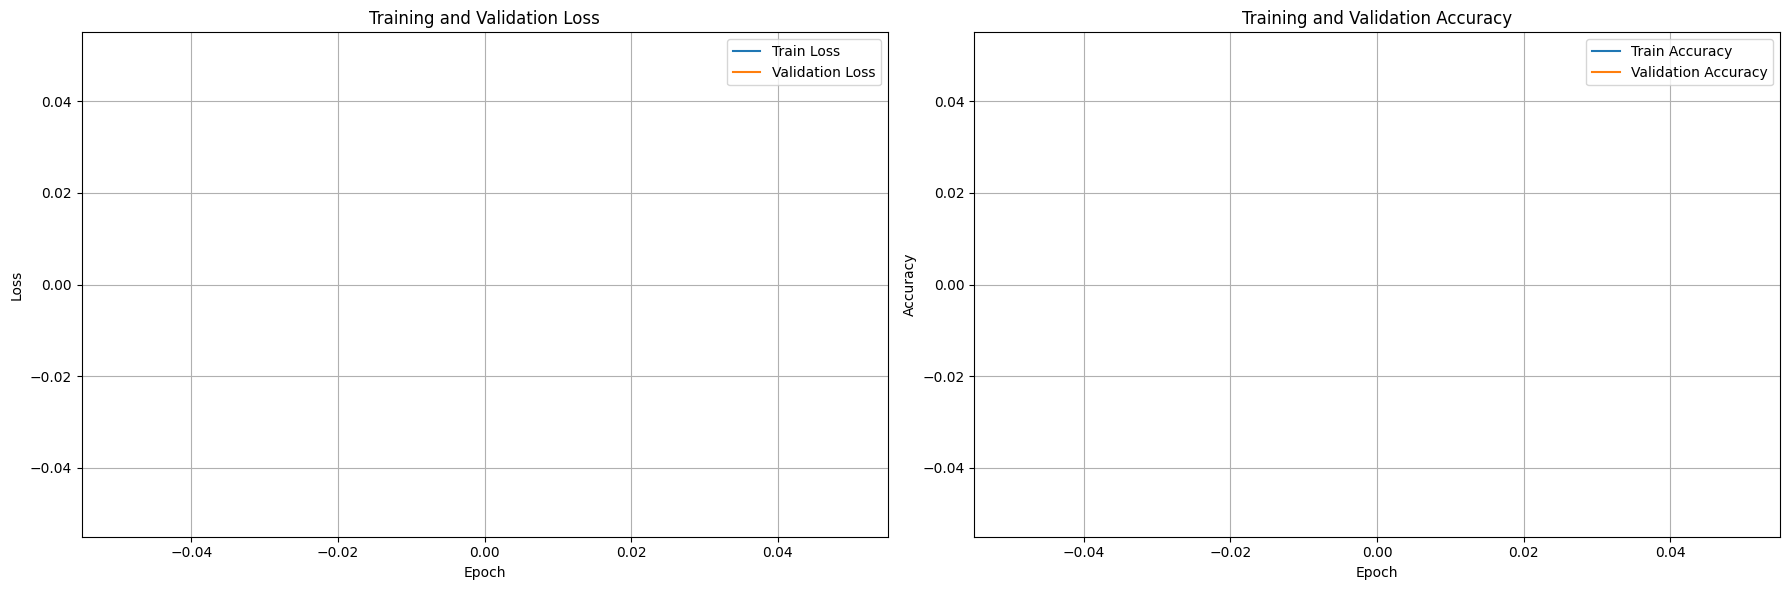

In [3]:
def main():
    # Configuration
    config_path = project_root / 'configs' / 'config.yaml'
    
    try:
        # Initialize trainer with config
        print("Initializing trainer...")
        trainer = Trainer(config_path=config_path)
        
        # Build model
        print("\nBuilding model...")
        model = trainer.build_model()
        trainer.model = model
        
        # Get data loaders
        print("\nPreparing data...")
        
        # First load the diagnostics to ensure data is properly loaded
        df = trainer.data_preprocessor.load_diagnostics()
        print("\nDataFrame loaded with columns:", df.columns.tolist())
        print("Sample data:")
        print(df[['Image', 'Left', 'Right', 'combined_label']].head())
        
        # Create datasets
        print("\nCreating datasets...")
        train_loader, val_loader, _ = trainer.data_preprocessor.create_datasets()
        
        # Print dataset information
        print(f"\nTraining samples: {len(train_loader.dataset)}")
        print(f"Validation samples: {len(val_loader.dataset)}")
        
        # Set batch size
        batch_size = trainer.config['training']['batch_size']
        train_loader = DataLoader(
            train_loader.dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers=trainer.config['hardware'].get('num_workers', 4),
            pin_memory=True,
            drop_last=True
        )
        val_loader = DataLoader(
            val_loader.dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=trainer.config['hardware'].get('num_workers', 4),
            pin_memory=True
        )
        
        # Initialize optimizer and scaler
        print("\nInitializing optimizer and scaler...")
        optimizer, scheduler = trainer.build_optimizer(model)
        
        # Use BCEWithLogitsLoss for binary classification
        # Note: Ensure your model outputs a single value per sample (not 2 values)
        criterion = nn.CrossEntropyLoss()
        scaler = torch.amp.GradScaler('cuda')
        
        # Update model's final layer for binary classification if needed
        if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Linear):
            if model.classifier.out_features != 1:  # If not already set for binary
                in_features = model.classifier.in_features
                model.classifier = nn.Linear(in_features, 1)
        
        # Start training
        print("\nStarting training...")
        num_epochs = trainer.config['training']['epochs']
        
        for epoch in range(num_epochs):
            # Train for one epoch
            train_loss, train_acc = trainer.train_epoch(
                model=model,
                train_loader=train_loader,
                criterion=criterion,
                optimizer=optimizer,
                scaler=scaler,
                epoch=epoch
            )
            
            # Validate
            val_loss, val_acc, val_metrics = trainer.validate_epoch(
                model=model,
                val_loader=val_loader,
                criterion=criterion,
                epoch=epoch
            )
            
            # Step the scheduler
            scheduler.step()
            
            # Print progress with binary classification metrics
            print(f"Epoch {epoch+1}/{num_epochs} - "
                  f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}% - "
                  f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")
        
        # Save final model
        final_model_path = os.path.join(trainer.config['output']['model_dir'], 'final_model.pth')
        torch.save({
            'model_state_dict': trainer.model.state_dict(),
            'config': trainer.config
        }, final_model_path)
        print(f"\nFinal model saved to: {final_model_path}")
        
        # Plot and save training history
        plot_path = os.path.join(trainer.config['output']['plot_dir'], 'training_history.png')
        TrainingMonitor.plot_training_history(trainer, save_path=plot_path)
        
    except Exception as e:
        print(f"\nError during training: {str(e)}")
        import traceback
        traceback.print_exc()
        raise

if __name__ == "__main__":
    main()